In [214]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib_inline as plt
%matplotlib inline

香港住宅用土地面積用率 ppt P.5

In [209]:
#https://data.gov.hk/tc-data/dataset/hk-pland-pland1-land-utilization-in-hong-kong-statistics/resource/ef09b603-bcc5-4a23-8ae4-201cf5cb988e
#data 來源
luhk=pd.read_csv(r'C:\Users\user\Desktop\erb\centaline_pj\土地用途HK_2022.csv')
luhk

,種類,類別,面積,百分比,備註
0,住宅,私人住宅,27,2.4,包括私人發展商發展的住宅用地(村屋、資助房屋和臨時房屋區除外)
1,住宅,公營房屋,18,1.6,包括資助房屋和臨時房屋區
2,住宅,鄉郊居所,35,3.1,包括村屋和臨時搭建物
3,商業,商業／商貿和辦公室,5,0.4,NaN
4,工業,工業用地,6,0.5,NaN
5,工業,工業邨／科技園,3,0.3,NaN
6,工業,貨倉和露天貯物,16,1.4,NaN
7,機構／休憩,政府、機構和社區設施,27,2.4,NaN
8,機構／休憩,休憩和康樂,29,2.6,包括公園、運動場、遊樂場和康樂設施
9,運輸,道路和運輸設施,47,4.2,NaN


In [218]:
from matplotlib.font_manager import  FontManager
import subprocess

mpl_fonts=set(f.name for f in FontManager().ttflist)

print('all font list get from matplotib.font_manager')
for f in sorted(mpl_fonts):
    print("\t"+f)

all font list get from matplotib.font_manager
	Agency FB
	Algerian
	Ami R
	Arial
	Arial Rounded MT Bold
	Bahnschrift
	Baskerville Old Face
	Bauhaus 93
	Bell MT
	Berlin Sans FB
	Berlin Sans FB Demi
	Bernard MT Condensed
	Blackadder ITC
	Bodoni MT
	Book Antiqua
	Bookman Old Style
	Bookshelf Symbol 7
	Bradley Hand ITC
	Britannic Bold
	Broadway
	Brush Script MT
	Calibri
	Californian FB
	Calisto MT
	Cambria
	Candara
	Castellar
	Centaur
	Century
	Century Gothic
	Century Schoolbook
	Chiller
	Colonna MT
	Comic Sans MS
	Consolas
	Constantia
	Cooper Black
	Copperplate Gothic Bold
	Copperplate Gothic Light
	Corbel
	Courier New
	Curlz MT
	DFKai-SB
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	Dubai
	Ebrima
	Edwardian Script ITC
	Elephant
	Engravers MT
	Eras Bold ITC
	Eras Demi ITC
	Eras Light ITC
	Eras Medium ITC
	FZShuTi
	FZYaoTi
	Felix Titling
	Footlight MT Light
	Forte
	Franklin Gothic Book
	Franklin Gothic Demi
	Franklin Gothic Demi Cond
	Franklin Got

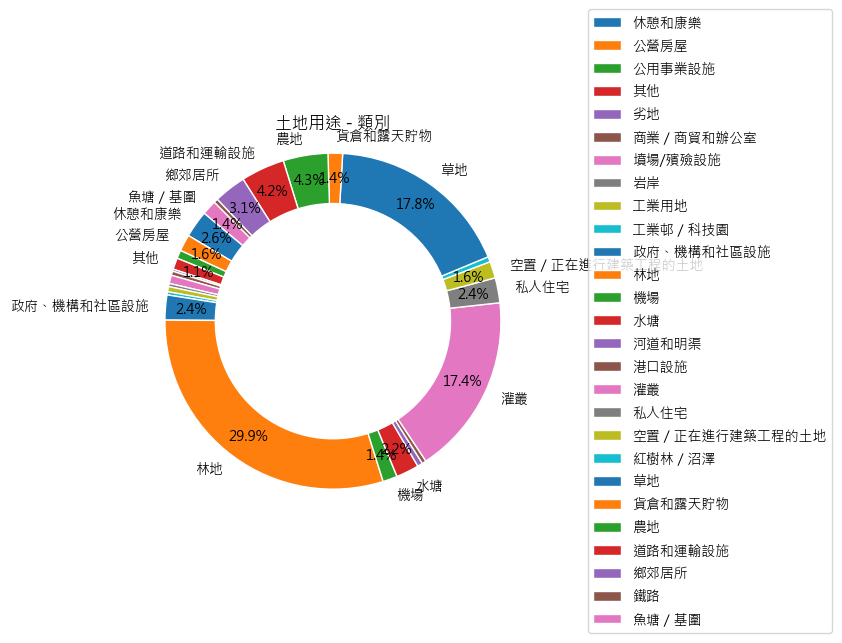

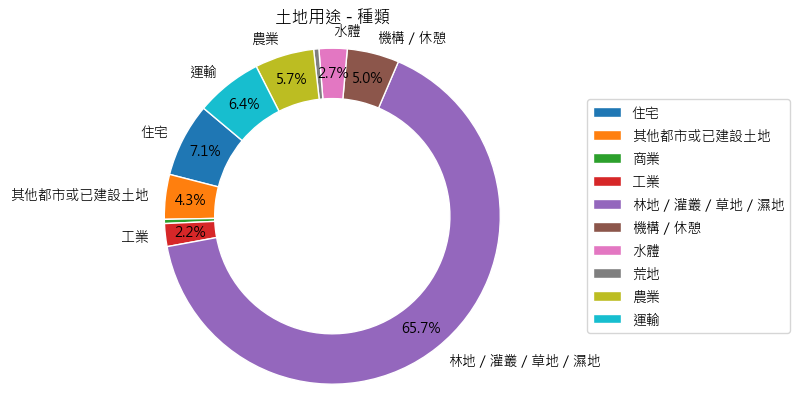

In [219]:
import matplotlib.pyplot as plt
plt.rc('font', family='Microsoft JhengHei')
# First Pie Chart: 類別 and 百分比
category_data = luhk.groupby('類別')['百分比'].sum().reset_index()

# Function to filter labels
def filter_labels(labels, percentages, threshold=1.0):
    return [label if percentage >= threshold else '' for label, percentage in zip(labels, percentages)]

filtered_labels = filter_labels(category_data['類別'], category_data['百分比'])

wedges, texts, autotexts = plt.pie(
    category_data['百分比'], 
    labels=filtered_labels, 
    autopct=lambda p: f'{p:.1f}%' if p >= 1 else '',
    pctdistance=0.85, 
    labeldistance=1.1,
    startangle=140,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

plt.title('土地用途 - 類別')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(wedges, category_data['類別'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

# Second Pie Chart: 種類 and 百分比
type_data = luhk.groupby('種類')['百分比'].sum().reset_index()

filtered_labels = filter_labels(type_data['種類'], type_data['百分比'])

wedges, texts, autotexts = plt.pie(
    type_data['百分比'], 
    labels=filtered_labels, 
    autopct=lambda p: f'{p:.1f}%' if p >= 1 else '',
    pctdistance=0.85, 
    labeldistance=1.1,
    startangle=140,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

plt.title('土地用途 - 種類')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(wedges, type_data['種類'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

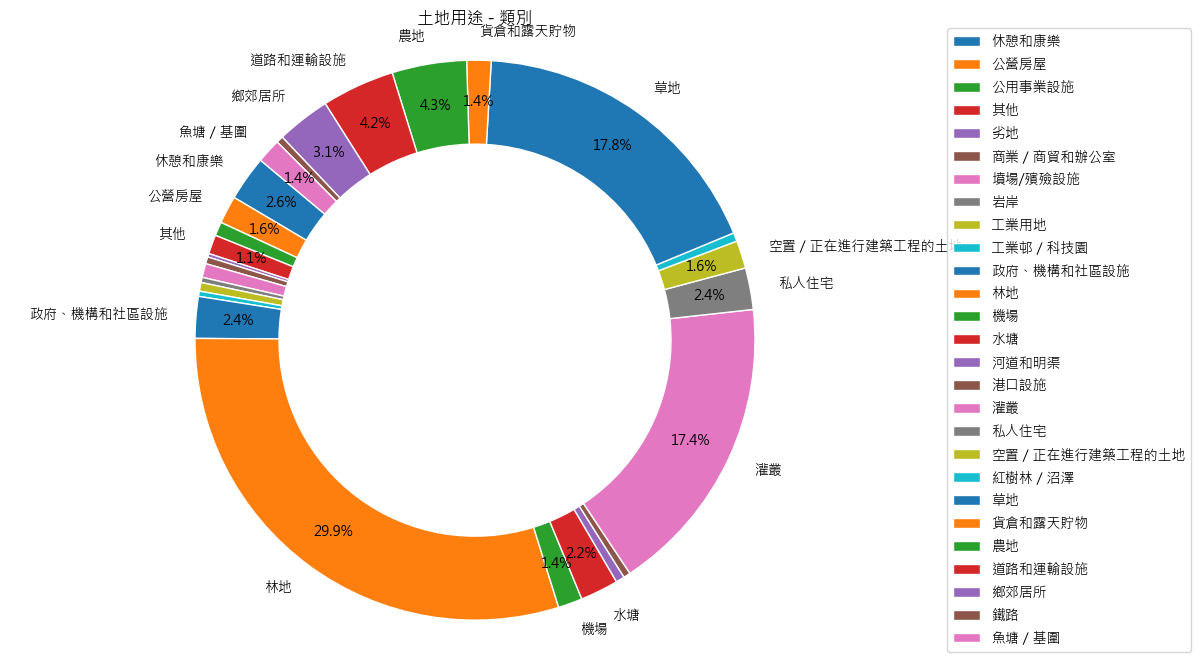

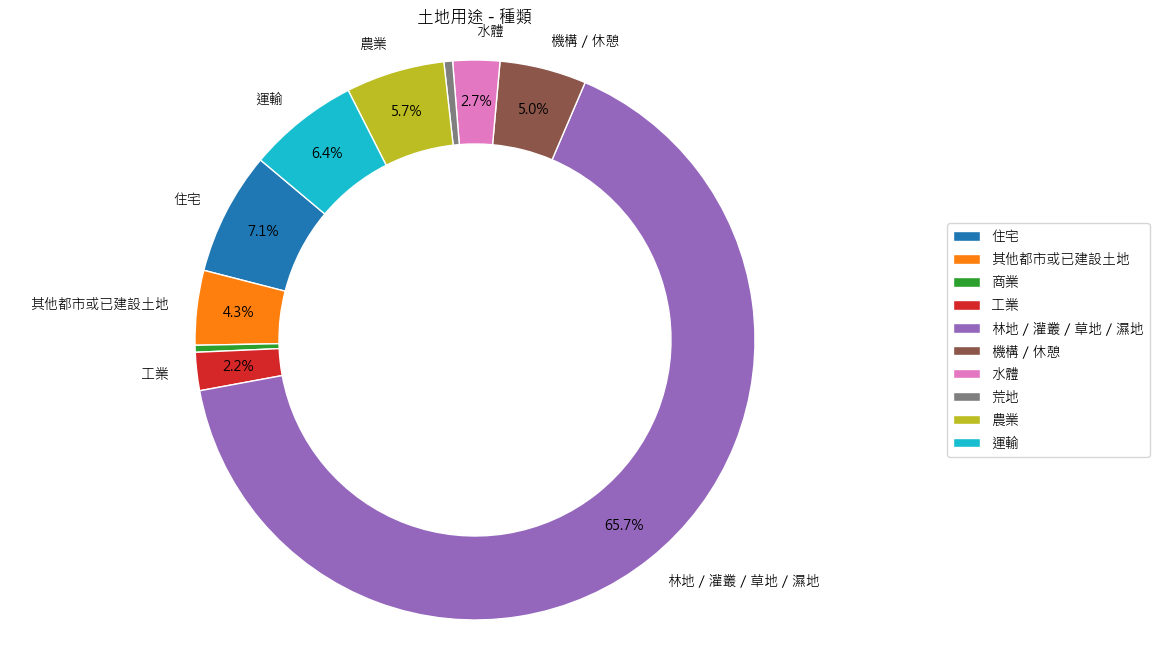

In [220]:
# First Pie Chart: 類別 and 百分比
category_data = luhk.groupby('類別')['百分比'].sum().reset_index()

# Function to filter labels
def filter_labels(labels, percentages, threshold=1.0):
    return [label if percentage >= threshold else '' for label, percentage in zip(labels, percentages)]

filtered_labels = filter_labels(category_data['類別'], category_data['百分比'])

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    category_data['百分比'], 
    labels=filtered_labels, 
    autopct=lambda p: f'{p:.1f}%' if p >= 1 else '',
    pctdistance=0.85, 
    labeldistance=1.1,
    startangle=140,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

plt.title('土地用途 - 類別')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(wedges, category_data['類別'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

# Second Pie Chart: 種類 and 百分比
type_data = luhk.groupby('種類')['百分比'].sum().reset_index()

filtered_labels = filter_labels(type_data['種類'], type_data['百分比'])

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    type_data['百分比'], 
    labels=filtered_labels, 
    autopct=lambda p: f'{p:.1f}%' if p >= 1 else '',
    pctdistance=0.85, 
    labeldistance=1.1,
    startangle=140,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

plt.title('土地用途 - 種類')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(wedges, type_data['種類'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

#介紹香港房地產市場的過去歷史 PPT P.6


In [187]:
centaline_data_housing_old = pd.read_excel(r"C:\Users\user\Desktop\erb\centaline_pj\查詢1994-05-31至2024-05-31中原城市領先指數.xlsx")
print(centaline_data_housing_old.to_string())

# 一手樓價

                           日期  中原城市領先指數
0     2024/05/20 - 2024/05/26    143.78
1     2024/05/13 - 2024/05/19    144.00
2     2024/05/06 - 2024/05/12    146.09
3     2024/04/29 - 2024/05/05    146.30
4     2024/04/22 - 2024/04/28    146.48
5     2024/04/15 - 2024/04/21    146.89
6     2024/04/08 - 2024/04/14    146.35
7     2024/04/01 - 2024/04/07    144.88
8     2024/03/25 - 2024/03/31    147.08
9     2024/03/18 - 2024/03/24    145.86
10    2024/03/11 - 2024/03/17    143.91
11    2024/03/04 - 2024/03/10    143.02
12    2024/02/26 - 2024/03/03    144.19
13    2024/02/19 - 2024/02/25    145.37
14    2024/02/12 - 2024/02/18    145.82
15    2024/02/05 - 2024/02/11    145.12
16    2024/01/29 - 2024/02/04    145.12
17    2024/01/22 - 2024/01/28    146.81
18    2024/01/15 - 2024/01/21    146.56
19    2024/01/08 - 2024/01/14    146.84
20    2024/01/01 - 2024/01/07    147.57
21    2023/12/25 - 2023/12/31    147.21
22    2023/12/18 - 2023/12/24    148.59
23    2023/12/11 - 2023/12/17    149.36


In [188]:
centaline_data_housing_old.columns = ['Date', 'CCL_housing']
def extract_end_date(date_range):
    return pd.to_datetime(date_range.split(' - ')[1])

centaline_data_housing_old['Date'] = centaline_data_housing_old['Date'].apply(extract_end_date)

In [190]:
centaline_data_housing_old

,Date,CCL_housing
0,2024-05-26,143.78
1,2024-05-19,144.00
2,2024-05-12,146.09
3,2024-05-05,146.30
4,2024-04-28,146.48
...,...,...
1560,1994-07-03,67.75
1561,1994-06-26,69.46
1562,1994-06-19,69.65
1563,1994-06-12,70.65


In [208]:
import plotly.graph_objects as go
from datetime import datetime

fig_old = px.line(centaline_data_housing_old, x='Date', y='CCL_housing')

events = [
    {'year': 1997, 'event': '1997年亞洲金融危機'},
    {'year': 2003, 'event': '2003年SARS疫情'},
    {'year': 2008, 'event': '2008年全球金融危機'},
    {'year': 2009, 'event': '2009-2013年量化寬鬆和低利率環境', 'end_year': 2013},
    {'year': 2014, 'event': '2014-2015年"佔中運動"', 'end_year': 2015},
    {'year': 2016, 'event': '2016-2018年房地產市場調控政策(「房住不炒」)', 'end_year': 2018},
    {'year': 2019, 'event': '2019年社會事件(民運事件)'},
    {'year': 2020, 'event': '2020年至新冠疫情+國安法'}
]

centaline_data_housing_old['Date'] = pd.to_datetime(centaline_data_housing_old['Date'])

for event in events:
    event_date = datetime(event['year'], 1, 1)
    fig_old.add_shape(type="line",
                  x0=event_date, y0=0, x1=event_date, y1=1,
                  xref="x", yref="paper",
                  line=dict(color="gray", width=1, dash="dash"))
    
    if 'end_year' in event:
        end_event_date = datetime(event['end_year'], 12, 31)
        fig_old.add_shape(type="line",
                      x0=end_event_date, y0=0, x1=end_event_date, y1=1,
                      xref="x", yref="paper",
                      line=dict(color="gray", width=1, dash="dash"))
    
    available_dates = centaline_data_housing_old[centaline_data_housing_old['Date'] >= event_date]['Date']
    if len(available_dates) > 0:
        nearest_date = min(available_dates)
        event_ccl = centaline_data_housing_old[centaline_data_housing_old['Date'] == nearest_date]['CCL_housing'].values[0]
        fig_old.add_trace(go.Scatter(x=[event_date], y=[event_ccl], mode='markers', 
                                     marker=dict(size=15, color='red'),
                                     hovertext=event['event'], showlegend=False))

fig_old.update_xaxes(range=['1997-01-01', centaline_data_housing_old['Date'].max()])
fig_old.update_xaxes(
    dtick="M12",  
    tickformat="%Y-%m"  
)

fig_old.update_layout(showlegend=False)

fig_old.show()

介紹香港房地產市場的現狀和趨勢(樓價指數) PPT P.7

In [223]:
centaline_data_housing_for_f = pd.read_excel(r"C:\Users\user\Desktop\erb\centaline_pj\查詢1994-05-31至2024-05-31中原城市領先指數.xlsx")
print(centaline_data_housing_for_f.to_string())

# 一手樓價

                           日期  中原城市領先指數
0     2024/05/20 - 2024/05/26    143.78
1     2024/05/13 - 2024/05/19    144.00
2     2024/05/06 - 2024/05/12    146.09
3     2024/04/29 - 2024/05/05    146.30
4     2024/04/22 - 2024/04/28    146.48
5     2024/04/15 - 2024/04/21    146.89
6     2024/04/08 - 2024/04/14    146.35
7     2024/04/01 - 2024/04/07    144.88
8     2024/03/25 - 2024/03/31    147.08
9     2024/03/18 - 2024/03/24    145.86
10    2024/03/11 - 2024/03/17    143.91
11    2024/03/04 - 2024/03/10    143.02
12    2024/02/26 - 2024/03/03    144.19
13    2024/02/19 - 2024/02/25    145.37
14    2024/02/12 - 2024/02/18    145.82
15    2024/02/05 - 2024/02/11    145.12
16    2024/01/29 - 2024/02/04    145.12
17    2024/01/22 - 2024/01/28    146.81
18    2024/01/15 - 2024/01/21    146.56
19    2024/01/08 - 2024/01/14    146.84
20    2024/01/01 - 2024/01/07    147.57
21    2023/12/25 - 2023/12/31    147.21
22    2023/12/18 - 2023/12/24    148.59
23    2023/12/11 - 2023/12/17    149.36


In [224]:
centaline_data_housing_for_f.columns = ['Date', 'CCL_housing']
def extract_end_date(date_range):
    return pd.to_datetime(date_range.split(' - ')[1])

centaline_data_housing_for_f['Date'] = centaline_data_housing_for_f['Date'].apply(extract_end_date)
centaline_data_housing_for_f

,Date,CCL_housing
0,2024-05-26,143.78
1,2024-05-19,144.00
2,2024-05-12,146.09
3,2024-05-05,146.30
4,2024-04-28,146.48
...,...,...
1560,1994-07-03,67.75
1561,1994-06-26,69.46
1562,1994-06-19,69.65
1563,1994-06-12,70.65


In [225]:
centaline_data_housing_for_f['Date'] = pd.to_datetime(centaline_data_housing_for_f['Date'])
centaline_data_housing_for_f = centaline_data_housing_for_f.sort_values('Date')

target_date = pd.to_datetime('2024-05-26')
target_data = centaline_data_housing_for_f[centaline_data_housing_for_f['Date'] == target_date]

if not target_data.empty:
    target_index = target_data.index[0]
    
    one_week_ago = target_date - pd.Timedelta(days=7)
    one_week_ago_data = centaline_data_housing_for_f[centaline_data_housing_for_f['Date'] <= one_week_ago].iloc[-1]
    target_data['WoW'] = (target_data['CCL_housing'].iloc[0] / one_week_ago_data['CCL_housing']) - 1
    
    one_month_ago = target_date - pd.Timedelta(days=30)
    one_month_ago_data = centaline_data_housing_for_f[centaline_data_housing_for_f['Date'] >= one_month_ago].iloc[0]
    target_data['MoM'] = (target_data['CCL_housing'].iloc[0] / one_month_ago_data['CCL_housing']) - 1
    
    one_year_ago = target_date - pd.Timedelta(days=365)
    one_year_ago_data = centaline_data_housing_for_f[centaline_data_housing_for_f['Date'] >= one_year_ago].iloc[0]
    target_data['YoY'] = (target_data['CCL_housing'].iloc[0] / one_year_ago_data['CCL_housing']) - 1
    
    # 搵1997年既最高點
    peak_1997 = centaline_data_housing_for_f[(centaline_data_housing_for_f['Date'] >= '1997-01-01') & (centaline_data_housing_for_f['Date'] <= '1997-12-31')]['CCL_housing'].max()
    peak_1997_date = centaline_data_housing_for_f[(centaline_data_housing_for_f['Date'] >= '1997-01-01') & (centaline_data_housing_for_f['Date'] <= '1997-12-31') & (centaline_data_housing['CCL_housing'] == peak_1997)]['Date'].iloc[0]

    # 搵2003年既最低點
    trough_2003 = centaline_data_housing_for_f[(centaline_data_housing_for_f['Date'] >= '2003-01-01') & (centaline_data_housing_for_f['Date'] <= '2003-12-31')]['CCL_housing'].min()
    trough_2003_date = centaline_data_housing_for_f[(centaline_data_housing_for_f['Date'] >= '2003-01-01') & (centaline_data_housing_for_f['Date'] <= '2003-12-31') & (centaline_data_housing['CCL_housing'] == trough_2003)]['Date'].iloc[0]

    # 計樓價跌幾多%
    drop_percentage = (trough_2003 - peak_1997) / peak_1997 * 100
    
    fig = px.line(centaline_data_housing_for_f, x='Date', y='CCL_housing', 
                  title='Centaline Leading Index')
    
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Centaline Leading Index',
        hovermode='x',
        template='plotly_white'
    )
    
    fig.add_annotation(
        x=target_data['Date'].iloc[0], 
        y=target_data['CCL_housing'].iloc[0],  
        text=f"CCL_housing: {target_data['CCL_housing'].iloc[0]:.2f}<br>WoW: {target_data['WoW'].iloc[0]:.2%}<br>MoM: {target_data['MoM'].iloc[0]:.2%}<br>YoY: {target_data['YoY'].iloc[0]:.2%}",
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=-60, 
        font=dict(size=12),
        align='left'
    )
    
    fig.add_annotation(
        x=peak_1997_date, 
        y=peak_1997,  
        text=f"1997 Peak: {peak_1997:.2f}",
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=-40, 
        font=dict(size=12),
        align='left'
    )

    fig.add_annotation(
        x=trough_2003_date, 
        y=trough_2003,  
        text=f"2003 Trough: {trough_2003:.2f}<br>Drop: {drop_percentage:.2f}%",
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=40, 
        font=dict(size=12),
        align='left'
    )

    fig.show()
else:
    print(f"No data found for {target_date}")

C:\Users\user\AppData\Local\Temp\ipykernel_15684\3286966664.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_15684\3286966664.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_15684\3286966664.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

介紹香港房地產市場的現狀和趨勢(租金指數) PPt P8

In [226]:
centaline_data_housing_rent = pd.read_excel(r"C:\Users\user\Desktop\erb\centaline_pj\查詢1997-02-01至2024-05-31中原城市租金指數.xlsx")
centaline_data_housing_rent.columns = ['Date', 'CCL_rent','rental return']
def extract_end_date(date_range):
    return pd.to_datetime(date_range.split(' - ')[1])

centaline_data_housing_rent['Date'] = centaline_data_housing_rent['Date'].apply(extract_end_date)
centaline_data_housing_rent

,Date,CCL_rent,rental return
0,2024-05-31,117.73,NaN
1,2024-04-30,117.09,NaN
2,2024-03-31,116.54,3.10
3,2024-02-29,115.90,3.12
4,2024-01-31,116.20,3.10
...,...,...,...
323,1997-06-30,96.68,3.69
324,1997-05-31,97.32,3.96
325,1997-04-30,95.28,3.91
326,1997-03-31,92.91,3.90


In [227]:
#rental return 有NAN所以我用.mean,fillnal補番入去出來係3.106667,原因我用2024所有回報率既平均去fillna


centaline_data_housing_rent_fina = centaline_data_housing_rent


mean_rental_return_2024 = centaline_data_housing_rent_fina[centaline_data_housing_rent_fina['Date'].dt.year == 2024]['rental return'].mean()

centaline_data_housing_rent_fina.loc[(centaline_data_housing_rent_fina['Date'].dt.year == 2024) & (centaline_data_housing_rent_fina['rental return'].isna()), 'rental return'] = mean_rental_return_2024

print(centaline_data_housing_rent_fina)

          Date  CCL_rent  rental return
0   2024-05-31    117.73       3.106667
1   2024-04-30    117.09       3.106667
2   2024-03-31    116.54       3.100000
3   2024-02-29    115.90       3.120000
4   2024-01-31    116.20       3.100000
..         ...       ...            ...
323 1997-06-30     96.68       3.690000
324 1997-05-31     97.32       3.960000
325 1997-04-30     95.28       3.910000
326 1997-03-31     92.91       3.900000
327 1997-02-28     90.42       4.050000

[328 rows x 3 columns]


In [228]:
centaline_data_housing_rent_fina['Date'] = pd.to_datetime(centaline_data_housing_rent_fina['Date'])
centaline_data_housing_rent_fina = centaline_data_housing_rent_fina.sort_values('Date')

target_date = pd.to_datetime('2024-05-31')
target_data = centaline_data_housing_rent_fina[centaline_data_housing_rent_fina['Date'] == target_date]

if not target_data.empty:
    target_index = target_data.index[0]

    # 因為日期不穩定直接用指定日期2024-04-30
    one_month_ago = pd.to_datetime('2024-04-30')
    one_month_ago_data = centaline_data_housing_rent_fina[centaline_data_housing_rent_fina['Date'] == one_month_ago]
    target_data['MoM_CCL_rent'] = (target_data['CCL_rent'].iloc[0] / one_month_ago_data['CCL_rent'].iloc[0]) - 1
    target_data['MoM_rental_return'] = (target_data['rental return'].iloc[0] / one_month_ago_data['rental return'].iloc[0]) - 1

    one_year_ago = pd.to_datetime('2023-05-31')
    one_year_ago_data = centaline_data_housing_rent_fina[centaline_data_housing_rent_fina['Date'] == one_year_ago]
    target_data['YoY_CCL_rent'] = (target_data['CCL_rent'].iloc[0] / one_year_ago_data['CCL_rent'].iloc[0]) - 1
    target_data['YoY_rental_return'] = (target_data['rental return'].iloc[0] / one_year_ago_data['rental return'].iloc[0]) - 1

    # 搵1997-2003年既最高點同最低點(租金)
    peak_1997_2003 = centaline_data_housing_rent_fina[(centaline_data_housing_rent_fina['Date'] >= '1997-01-01') & (centaline_data_housing_rent_fina['Date'] <= '2003-12-31')]['CCL_rent'].max()
    peak_1997_2003_date = centaline_data_housing_rent_fina[(centaline_data_housing_rent_fina['Date'] >= '1997-01-01') & (centaline_data_housing_rent_fina['Date'] <= '2003-12-31') & (centaline_data_housing_rent_fina['CCL_rent'] == peak_1997_2003)]['Date'].iloc[0]

    trough_1997_2003 = centaline_data_housing_rent_fina[(centaline_data_housing_rent_fina['Date'] >= '1997-01-01') & (centaline_data_housing_rent_fina['Date'] <= '2003-12-31')]['CCL_rent'].min()
    trough_1997_2003_date = centaline_data_housing_rent_fina[(centaline_data_housing_rent_fina['Date'] >= '1997-01-01') & (centaline_data_housing_rent_fina['Date'] <= '2003-12-31') & (centaline_data_housing_rent_fina['CCL_rent'] == trough_1997_2003)]['Date'].iloc[0]

    # 搵1997-2003年跌既%(用黎同1手樓做比較)
    drop_percentage_1997_2003 = (trough_1997_2003 - peak_1997_2003) / peak_1997_2003 * 100

    # 搵1997-2003年租金回報率既最低點和最高點(租金回報率)
    trough_rental_return_1997_2003 = centaline_data_housing_rent_fina[(centaline_data_housing_rent_fina['Date'] >= '1997-01-01') & (centaline_data_housing_rent_fina['Date'] <= '2003-12-31')]['rental return'].min()
    trough_rental_return_1997_2003_date = centaline_data_housing_rent_fina[(centaline_data_housing_rent_fina['Date'] >= '1997-01-01') & (centaline_data_housing_rent_fina['Date'] <= '2003-12-31') & (centaline_data_housing_rent_fina['rental return'] == trough_rental_return_1997_2003)]['Date'].iloc[0]

    peak_rental_return_1997_2003 = centaline_data_housing_rent_fina[(centaline_data_housing_rent_fina['Date'] >= '1997-01-01') & (centaline_data_housing_rent_fina['Date'] <= '2003-12-31')]['rental return'].max()
    peak_rental_return_1997_2003_date = centaline_data_housing_rent_fina[(centaline_data_housing_rent_fina['Date'] >= '1997-01-01') & (centaline_data_housing_rent_fina['Date'] <= '2003-12-31') & (centaline_data_housing_rent_fina['rental return'] == peak_rental_return_1997_2003)]['Date'].iloc[0]

    # 搵1997-2003年租金回報率既升幅%
    gain_percentage_rental_return_1997_2003 = (peak_rental_return_1997_2003 - trough_rental_return_1997_2003) / trough_rental_return_1997_2003 * 100

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=centaline_data_housing_rent_fina['Date'], y=centaline_data_housing_rent_fina['CCL_rent'],
                             mode='lines', name='CCL_rent'))

    fig.add_trace(go.Scatter(x=centaline_data_housing_rent_fina['Date'], y=centaline_data_housing_rent_fina['rental return'],
                             mode='lines', name='Rental Return', yaxis='y2'))

    fig.update_layout(
        title='Centaline Leading Index and Rental Return',
        xaxis_title='Date',
        yaxis=dict(title='CCL_rent'),
        yaxis2=dict(title='Rental Return', overlaying='y', side='right'),
        hovermode='x',
        template='plotly_white'
    )

    fig.add_annotation(
        x=target_data['Date'].iloc[0], 
        y=target_data['CCL_rent'].iloc[0],  
        text=f"CCL_rent: {target_data['CCL_rent'].iloc[0]:.2f}<br>MoM: {target_data['MoM_CCL_rent'].iloc[0]:.2%}<br>YoY: {target_data['YoY_CCL_rent'].iloc[0]:.2%}",
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=-40, 
        font=dict(size=12),
        align='left'
    )
    fig.add_annotation(
        x=target_data['Date'].iloc[0], 
        y=target_data['rental return'].iloc[0],  
        text=f"Rental Return: {target_data['rental return'].iloc[0]:.2f}<br>MoM: {target_data['MoM_rental_return'].iloc[0]:.2%}<br>YoY: {target_data['YoY_rental_return'].iloc[0]:.2%}",
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=-40, 
        font=dict(size=12),
        align='left',
        yref='y2'
    )

    fig.add_annotation(
        x=peak_1997_2003_date, 
        y=peak_1997_2003,  
        text=f"1997-2003 Peak: {peak_1997_2003:.2f}",
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=-40, 
        font=dict(size=12),
        align='left'
    )

    fig.add_annotation(
        x=trough_1997_2003_date, 
        y=trough_1997_2003,  
        text=f"1997-2003 Trough: {trough_1997_2003:.2f}<br>Drop: {drop_percentage_1997_2003:.2f}%",
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=40, 
        font=dict(size=12),
        align='left'
    )

    fig.add_annotation(
        x=trough_rental_return_1997_2003_date, 
        y=trough_rental_return_1997_2003,  
        text=f"1997-2003 Rental Return Trough: {trough_rental_return_1997_2003:.2f}",
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=40, 
        font=dict(size=12),
        align='left',
        yref='y2'
    )

    fig.add_annotation(
        x=peak_rental_return_1997_2003_date, 
        y=peak_rental_return_1997_2003,  
        text=f"1997-2003 Rental Return Peak: {peak_rental_return_1997_2003:.2f}<br>Gain: {gain_percentage_rental_return_1997_2003:.2f}%",
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=-40, 
        font=dict(size=12),
        align='left',
        yref='y2'
    )

    fig.show()
else:
    print(f"No data found for {target_date}")

C:\Users\user\AppData\Local\Temp\ipykernel_15684\2572748856.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_15684\2572748856.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_15684\2572748856.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

介紹香港房地產市場的現狀和趨勢(供應問題) ppt p.9


In [ ]:
##96-2001的年月份的成交數據在 這個 URL https://www.midland.com.hk/land-registry-record/1996.html
#數據在土地注署 https://www.landreg.gov.hk/tc/monthly/agt-pri-1.htm

In [239]:
df_dd_h=pd.read_excel(r'C:\Users\user\Desktop\erb\centaline_pj\成交.xlsx')
df_dd_h = df_dd_h.rename(columns={
    '年': 'Year',
    '月': 'month',
    '一手買賣': 'first_hand_deal',
    '二手買賣': 'second_hand_deal'
})
df_dd_h.columns = ['Year','month','first_hand_deal','second_hand_deal']
df_dd_h['total'] = df_dd_h['first_hand_deal'] + df_dd_h['second_hand_deal']
df_dd_h


,Year,month,first_hand_deal,second_hand_deal,total
0,2023,1,363,2688,3051
1,2023,2,655,3627,4282
2,2023,3,1787,4903,6690
3,2023,4,1550,3003,4553
4,2023,5,1000,3003,4003
...,...,...,...,...,...
331,1996,8,2484,10154,12638
332,1996,9,2846,8899,11745
333,1996,10,3032,9070,12102
334,1996,11,4315,9546,13861


In [240]:
new_data = {
    'Year': [2024, 2024, 2024, 2024, 2024],
    'month': [1, 2, 3, 4, 5],
    'first_hand_deal': [1052, 416, 1548, 3823, 2019],
    'second_hand_deal': [2712, 2219, 2701, 5352, 4536],
    'total': [1052+2712, 416+2219, 1548+2701, 3823+5352, 2019+4536]
}

df_new_data = pd.DataFrame(new_data)

df_dd_h = pd.concat([df_dd_h, df_new_data], ignore_index=True)
df_dd_h

,Year,month,first_hand_deal,second_hand_deal,total
0,2023,1,363,2688,3051
1,2023,2,655,3627,4282
2,2023,3,1787,4903,6690
3,2023,4,1550,3003,4553
4,2023,5,1000,3003,4003
...,...,...,...,...,...
336,2024,1,1052,2712,3764
337,2024,2,416,2219,2635
338,2024,3,1548,2701,4249
339,2024,4,3823,5352,9175


In [235]:
centaline_data_housing_t = pd.read_excel(r"C:\Users\user\Desktop\erb\centaline_pj\查詢1994-05-31至2024-05-31中原城市領先指數.xlsx")
centaline_data_housing_t.columns = ['Date', 'CCL_housing']
def extract_end_date(date_range):
    return pd.to_datetime(date_range.split(' - ')[1])

centaline_data_housing_t['Date'] = centaline_data_housing_t['Date'].apply(extract_end_date)
centaline_data_housing_t

# 一手樓價

,Date,CCL_housing
0,2024-05-26,143.78
1,2024-05-19,144.00
2,2024-05-12,146.09
3,2024-05-05,146.30
4,2024-04-28,146.48
...,...,...
1560,1994-07-03,67.75
1561,1994-06-26,69.46
1562,1994-06-19,69.65
1563,1994-06-12,70.65


In [241]:
centaline_data_housing_t['Year'] = pd.to_datetime(centaline_data_housing_t['Date']).dt.year
centaline_data_housing_t['month'] = pd.to_datetime(centaline_data_housing_t['Date']).dt.month
cb_merged_df = pd.merge(centaline_data_housing_t, df_dd_h, on=['Year', 'month'])

In [242]:
cb_merged_df

,Date,CCL_housing,Year,month,first_hand_deal,second_hand_deal,total
0,2024-05-26,143.78,2024,5,2019,4536,6555
1,2024-05-19,144.00,2024,5,2019,4536,6555
2,2024-05-12,146.09,2024,5,2019,4536,6555
3,2024-05-05,146.30,2024,5,2019,4536,6555
4,2024-04-28,146.48,2024,4,3823,5352,9175
...,...,...,...,...,...,...,...
1477,1996-02-04,58.12,1996,2,3618,11709,15327
1478,1996-01-28,59.08,1996,1,2768,15054,17822
1479,1996-01-21,57.25,1996,1,2768,15054,17822
1480,1996-01-14,55.81,1996,1,2768,15054,17822


In [243]:
import plotly.graph_objects as go
from scipy.stats import pearsonr


ccl_monthly_avg = cb_merged_df.groupby(['Year', 'month'])['CCL_housing'].mean().reset_index()
deals_monthly_sum = cb_merged_df.groupby(['Year', 'month'])[['first_hand_deal', 'second_hand_deal']].sum().reset_index()
ccl_monthly_avg['date'] = pd.to_datetime(ccl_monthly_avg['Year'].astype(str) + '-' + ccl_monthly_avg['month'].astype(str))
deals_monthly_sum['date'] = pd.to_datetime(deals_monthly_sum['Year'].astype(str) + '-' + deals_monthly_sum['month'].astype(str))

# 總成交量
deals_monthly_sum['total_deals'] = deals_monthly_sum['first_hand_deal'] + deals_monthly_sum['second_hand_deal']

# 相關係數
correlation, _ = pearsonr(ccl_monthly_avg['CCL_housing'], deals_monthly_sum['total_deals'])


fig = go.Figure()

fig.add_trace(go.Bar(x=deals_monthly_sum['date'], y=deals_monthly_sum['first_hand_deal'],
                     name='一手成交量'))
fig.add_trace(go.Bar(x=deals_monthly_sum['date'], y=deals_monthly_sum['second_hand_deal'],
                     name='二手成交量'))

fig.add_trace(go.Scatter(x=ccl_monthly_avg['date'], y=ccl_monthly_avg['CCL_housing'],
                         mode='lines', name='CCL房屋價格指數', yaxis='y2'))

fig.add_annotation(
    x=0.5,
    y=0.85,
    xref='paper',
    yref='paper',
    text=f'樓價與成交量相關係數: {correlation:.2f}',
    showarrow=False,
    font=dict(size=14)
)


fig.update_layout(
    title='CCL房屋價格指數與成交量走勢',
    xaxis=dict(
        title='日期',
        tickangle=-45,
        tickmode='auto',
        nticks=20
    ),
    yaxis=dict(
        title='成交量',
        tickformat=",d"
    ),
    yaxis2=dict(
        title='CCL房屋價格指數',
        overlaying='y',
        side='right',
        tickformat=".2f"
    ),
    legend=dict(x=0.5, y=1, orientation='h'),
    barmode='stack'
)

fig.show()

香港樓價與實用面積的趨勢 ppt p.10

In [244]:
#實用面積推測
#https://www.legco.gov.hk/research-publications/chinese/2022fs06-housing-situation-and-housing-supply-in-hong-kong-20221011-c.pdf 資料來源
#https://www.rvd.gov.hk/tc/publications/hkpr_previous.html   資料來源 (都是pdf只有在2010-2019找到實用面積中數)
'''透過第一份資料來源 2007-2011年: <0.01

在2007年至2011年期間,面積小於40平方米的"納米單位"落成量佔私人住宅總落成量的比例小於1%。
"<"符號表示"小於"。
2012-2016年: 0.04

在2012年至2016年期間,"納米單位"佔私人住宅總落成量的4%。
2017-2021年: 0.36

在2017年至2021年期間,"納米單位"佔私人住宅總落成量的36%,反映近年超小單位供應大幅增加。
數字的單位是"萬個單位",因此0.04萬個單位相當於400個單位。'''
'''透過第二份資源來源  推算方法:假設2010年之前和2019年之後的面積中位數變化趨勢與2010-2019年期間的變化趨勢相似'''
# 已知data來自資料2
actual_data = {
    2010: 43.9,
    2011: 43.2,
    2012: 42.8,
    2013: 42.5,
    2014: 42.0,
    2015: 40.8,
    2016: 40.3,
    2017: 40.0,
    2018: 39.5,
    2019: 39.1
}

# 計每年實用面積中位數減少量(用已知道DATA年/toatl年)
yearly_decrease = (actual_data[2010] - actual_data[2019]) / 9
print(yearly_decrease)

# 估算1997年至2009年的data
estimated_data = {}
for year in range(1997, 2010):
    estimated_value = actual_data[2010] + (2010 - year) * yearly_decrease
    estimated_data[year] = round(estimated_value, 1)

# 估算2020年至2024年data
for year in range(2020, 2025):
    estimated_value = actual_data[2019] - (year - 2019) * yearly_decrease
    actual_data[year] = round(estimated_value, 1)

# MIX_DATA
mix_data = {**estimated_data, **actual_data}

df_mix_data = pd.DataFrame.from_dict(mix_data, orient='index', columns=['Median_usable_area'])
df_mix_data.index.name = 'year'

print(df_mix_data)

0.533333333333333
      Median_usable_area
year                    
1997                50.8
1998                50.3
1999                49.8
2000                49.2
2001                48.7
2002                48.2
2003                47.6
2004                47.1
2005                46.6
2006                46.0
2007                45.5
2008                45.0
2009                44.4
2010                43.9
2011                43.2
2012                42.8
2013                42.5
2014                42.0
2015                40.8
2016                40.3
2017                40.0
2018                39.5
2019                39.1
2020                38.6
2021                38.0
2022                37.5
2023                37.0
2024                36.4


In [245]:
centaline_data_housing_for_area = pd.read_excel(r"C:\Users\user\Desktop\erb\centaline_pj\查詢1994-05-31至2024-05-31中原城市領先指數.xlsx")
# 一手樓價跟面積
centaline_data_housing_for_area.columns = ['Date', 'CCL_housing']

def extract_end_date(date_range):
    return pd.to_datetime(date_range.split(' - ')[1])

centaline_data_housing_for_area['Date'] = centaline_data_housing_for_area['Date'].apply(extract_end_date)


centaline_data_housing_for_area

,Date,CCL_housing
0,2024-05-26,143.78
1,2024-05-19,144.00
2,2024-05-12,146.09
3,2024-05-05,146.30
4,2024-04-28,146.48
...,...,...
1560,1994-07-03,67.75
1561,1994-06-26,69.46
1562,1994-06-19,69.65
1563,1994-06-12,70.65


In [246]:
import plotly.graph_objects as go
#樓價跟實用面積圖
centaline_data_housing_for_area['Date'] = pd.to_datetime(centaline_data_housing_for_area['Date'])
centaline_data_housing_for_area['year'] = centaline_data_housing_for_area['Date'].dt.year
centaline_yearly_median = centaline_data_housing_for_area.groupby('year')['CCL_housing'].median().reset_index()
merged_data_PNA = pd.merge(df_mix_data, centaline_yearly_median, on='year', how='outer')

# 只要1997後的data
merged_data_filtered_PNA = merged_data_PNA[merged_data_PNA['year'] >= 1997]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=merged_data_filtered_PNA['year'],
    y=merged_data_filtered_PNA['Median_usable_area'],
    name='Median Usable Area',
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=merged_data_filtered_PNA['year'],
    y=merged_data_filtered_PNA['CCL_housing'],
    name='CCL Housing',
    yaxis='y2'
))


fig.update_layout(
    title='Median Usable Area and CCL Housing Over Years (From 1997)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Usable Area (sq. m)', side='left'),
    yaxis2=dict(title='CCL Housing', side='right', overlaying='y')
)

fig.show()

In [247]:
merged_data_filtered_PNA.corr()

,year,Median_usable_area,CCL_housing
year,1.000000,-0.999536,0.892792
Median_usable_area,-0.999536,1.000000,-0.894044
CCL_housing,0.892792,-0.894044,1.000000


以下是PPT 樓價,按揭利率,負資產個案三方探討 PPT P.11

In [248]:
#按揭利率
#1997-2024DATA https://www.hkma.gov.hk/chi/data-publications-and-research/data-and-statistics/monthly-statistical-bulletin/table/
#找住宅按揭統計調查結果(XLSX中有新批按揭貸款的利率)
#DATA只有到2016年,其他DATA要去這找 https://www.hkma.gov.hk/chi/news-and-media/press-releases/?&t=1720627309804  (住宅按揭每月統計調查結果)
#附件中第6個,當月新批按揭貸款的利率(請用其他的利率)因為其他的利率是最接近6大銀行的利率


# 按年份既抵押貸款利率數據(DATA來自上方)
mortgage_rates = {
    1995: 8.75,
    1996: 8.50,
    1997: 10.25,
    1998: 10.13,
    1999: 8.88,
    2000: 9.50,
    2001: 5.13,
    2002: 2.50,
    2003: 2.50,
    2004: 2.50,
    2005: 4.38,
    2006: 5.25,
    2007: 5.25,
    2008: 3.25,
    2009: 2.50,
    2010: 2.50,
    2011: 2.50,
    2012: 2.50,
    2013: 2.50,
    2014: 2.50,
    2015: 2.50,
    2016: 2.50,
    2017: 2.50,
    2018: 2.50,
    2019: 2.75,
    2020: 2.50,
    2021: 2.50,
    2022: 4.75,
    2023: 5.50,
    2024: 4.5,
}


df_mortgage_rates_data = pd.DataFrame.from_dict(mortgage_rates, orient='index', columns=['mortgage_rates'])
df_mortgage_rates_data.index.name = 'year'


df_mortgage_rates_data

,mortgage_rates
year,
1995,8.75
1996,8.50
1997,10.25
1998,10.13
1999,8.88
2000,9.50
2001,5.13
2002,2.50
2003,2.50


In [249]:
centaline_data_housing_for_mortgage_rates = pd.read_excel(r"C:\Users\user\Desktop\erb\centaline_pj\查詢1994-05-31至2024-05-31中原城市領先指數.xlsx")
#print(centaline_data_housing_for_mortgage_rates.to_string())
centaline_data_housing_for_mortgage_rates.columns = ['Date', 'CCL_housing']

def extract_end_date(date_range):
    return pd.to_datetime(date_range.split(' - ')[1])

centaline_data_housing_for_mortgage_rates['Date'] = centaline_data_housing_for_mortgage_rates['Date'].apply(extract_end_date)


centaline_data_housing_for_mortgage_rates
# 一手樓價跟利率

,Date,CCL_housing
0,2024-05-26,143.78
1,2024-05-19,144.00
2,2024-05-12,146.09
3,2024-05-05,146.30
4,2024-04-28,146.48
...,...,...
1560,1994-07-03,67.75
1561,1994-06-26,69.46
1562,1994-06-19,69.65
1563,1994-06-12,70.65


In [250]:
centaline_data_housing_for_mortgage_rates['Date'] = pd.to_datetime(centaline_data_housing_for_mortgage_rates['Date'])
centaline_data_housing_for_mortgage_rates['year'] = centaline_data_housing_for_mortgage_rates['Date'].dt.year
centaline_yearly_median_mr = centaline_data_housing_for_mortgage_rates.groupby('year')['CCL_housing'].median().reset_index()
merged_data_PMR = pd.merge(df_mortgage_rates_data, centaline_yearly_median_mr, on='year', how='outer')

In [252]:
import plotly.graph_objects as go


fig = go.Figure()


fig.add_trace(go.Scatter(x=merged_data_PMR['year'], y=merged_data_PMR['CCL_housing'], mode='lines+markers', name='CCL_housing', yaxis='y1'))

fig.add_trace(go.Scatter(x=merged_data_PMR['year'], y=merged_data_PMR['mortgage_rates'], mode='lines+markers', name='mortgage_rates', yaxis='y2'))

fig.update_layout(
    title="樓價和利率趨勢",
    xaxis_title="Year",
    yaxis=dict(
        title="CCL_housing",
        titlefont=dict(color="#1f77b4"),
        tickfont=dict(color="#1f77b4"),
    ),
    yaxis2=dict(
        title="Mortgage Rates",
        titlefont=dict(color="#ff7f0e"),
        tickfont=dict(color="#ff7f0e"),
        overlaying="y",
        side="right",
    ),
    legend=dict(x=0.5, y=0.9)
)

fig.show()

In [254]:
#負資產DATA
#新增負資產拖欠比率(3M)
#DATA來源https://www.hkma.gov.hk/chi/news-and-media/press-releases/2024/04/20240430-9/ 

data = [
    ['2024-Q1', 32073, 5.47, 165349, 8.91, 11223, 1.07,0.06],
    ['2023-Q4', 25163, 4.29, 131297, 7.07, 7314, 1.06,0.03],
    ['2023-Q3', 11123, 1.9, 59263, 3.19, 1981, 1.03,0.02],
    ['2023-Q2', 3341, 0.57, 17351, 0.94, 305, 1.02,0.09],
    ['2023-Q1', 6379, 1.1, 34362, 1.89, 725, 1.02,0.04],
    ['2022-Q4', 12164, 2.1, 66252, 3.66, 2517, 1.04,0],
    ['2022-Q3', 533, 0.09, 3006, 0.17, 59, 1.02,0],
    ['2022-Q2', 55, '*', 300, '*', 4, 1.01,0],
    ['2022-Q1', 104, '*', 610, '*', 12, 1.02,0],
    ['2021-Q4', 21, '*', 126, '*', 2, 1.01,0],
    ['2021-Q3', 3, '*', 9, '*', 0.33, 1.04,0],
    ['2021-Q2', 5, '*', 21, '*', 1, 1.05,0],
    ['2021-Q1', 67, '*', 379, '*', 10, 1.03,0],
    ['2020-Q4', 185, '*', 1060, 0.07, 30, 1.03,0],
    ['2020-Q3', 199, '*', 1155, 0.07, 33, 1.03,0],
    ['2020-Q2', 127, '*', 727, 0.05, 22, 1.03,0],
    ['2020-Q1', 384, 0.07, 1867, 0.13, 81, 1.05,0],
    ['2019-Q4', 128, '*', 764, 0.05, 25, 1.03,0],
    ['2019-Q3', 52, '*', 324, '*', 7, 1.02,0],
    ['2019-Q2', 1, '*', 3, '*', 0.12, 1.04,0],
    ['2019-Q1', 43, '*', 226, '*', 5, 1.02,0],
    ['2018-Q4', 258, 0.05, 1170, 0.09, 57, 1.05,0],
    ['2018-Q3', 0, 0, 0, 0, 0, 0,0],
    ['2018-Q2', 0, 0, 0, 0, 0, 0,0],
    ['2018-Q1', 0, 0, 0, 0, 0, 0,0],
    ['2017-Q4', 0, 0, 0, 0, 0, 0,0],
    ['2017-Q3', 0, 0, 0, 0, 0, 0,0],
    ['2017-Q2', 0, 0, 0, 0, 0, 0,0],
    ['2017-Q1', 0, 0, 0, 0, 0, 0,0],
    ['2016-Q4', 4, '*', 11, '*', 0.08, 1.01,0],
    ['2016-Q3', 69, 0.0, 282, 0.0, 6, 1.02,0],
    ['2016-Q2', 1307, 0.3, 4452, 0.4, 157, 1.04,0],
    ['2016-Q1', 1432, 0.3, 4919, 0.5, 195, 1.04,0],
    ['2015-Q4', 0, 0, 0, 0, 0, 0,0],
    ['2015-Q3', 0, 0, 0, 0, 0, 0,0],
    ['2015-Q2', 0, 0, 0, 0, 0, 0,0],
    ['2015-Q1', 0, 0, 0, 0, 0, 0,0],
    ['2014-Q4', 0, 0, 0, 0, 0, 0,0],
    ['2014-Q3', 1, 0.0, 2, 0.0, 0.02, 1.01,0],
    ['2014-Q2', 30, 0.0, 129, 0.0, 3, 1.02,0],
    ['2014-Q1', 81, 0.0, 345, 0.0, 8, 1.02,0],
    ['2013-Q4', 26, 0.0, 120, 0.0, 3, 1.03,0],
    ['2013-Q3', 6, 0.0, 31, 0.0, 1, 1.04,0],
    ['2013-Q2', 21, 0.0, 87, 0.0, 1, 1.01,0],
    ['2013-Q1', 0, 0.0, 0, 0.0, 0, 0.0,0],
    ['2012-Q4', 0, 0.0, 0, 0.0, 0, 0.0,0],
    ['2012-Q3', 0, 0.0, 0, 0.0, 0, 0.0,0],
    ['2012-Q2', 5, 0.0, 16, 0.0, 0.3, 1.02,0],
    ['2012-Q1', 78, 0.0, 236, 0.0, 4, 1.02,0],
    ['2011-Q4', 1465, 0.3, 3647, 0.5, 122, 1.03,0],
    ['2011-Q3', 1653, 0.3, 4148, 0.5, 165, 1.04,0],
    ['2011-Q2', 48, 0.0, 58, 0.0, 18, 1.45,0],
    ['2011-Q1', 59, 0.0, 72, 0.0, 22, 1.45,0],
    ['2010-Q4', 118, 0.0, 150, 0.0, 50, 1.46,0.69],
    ['2010-Q3', 152, 0.0, 200, 0.0, 100, 1.38,0.93],
    ['2010-Q2', 310, 0.1, 500, 0.1, 100, 1.22,0],
    ['2010-Q1', 303, 0.1, 400, 0.1, 100, 1.30,0.24],
    ['2009-Q4', 466, 0.1, 700, 0.1, 100, 1.26,0.57],
    ['2009-Q3', 835, 0.2, 1500, 0.2, 200, 1.16,0.82],
    ['2009-Q2', 3767, 0.8, 8100, 1.3, 600, 1.08,0.17],
    ['2009-Q1', 9553, 2.0, 21400, 3.6, 2100, 1.11,0.12],
    ['2008-Q4', 10949, 2.3, 24800, 4.2, 2700, 1.12,0.05],
    ['2008-Q3', 2568, 0.5, 6000, 1.0, 400, 1.07,0.08],
    ['2008-Q2', 936, 0.2, 1700, 0.3, 200, 1.12,0.61],
    ['2008-Q1', 953, 0.2, 1600, 0.3, 200, 1.18,1.13],
    ['2007-Q4', 1861, 0.4, 3000, 0.5, 400, 1.17,1.75],
    ['2007-Q3', 3482, 1, 6000, 1, 1000, 1.16,1.57],
    ['2007-Q2', 4676, 1, 8000, 1, 1000, 1.15,1.42],
    ['2007-Q1', 6679, 1, 11000, 2, 1000, 1.14,1.32],
    ['2006-Q4', 8444, 2, 14000, 3, 2000, 1.13,1.26],
    ['2006-Q3', 8813, 2, 15000, 3, 2000, 1.13,1.21],
    ['2006-Q2', 8777, 2, 15000, 3, 2000, 1.13,1.13],
    ['2006-Q1', 9193, 2, 16000, 3, 2000, 1.13,1.04],
    ['2005-Q4', 10983, 2, 19000, 4, 2000, 1.13,0.89],
    ['2005-Q3', 9056, 2, 16000, 3, 2000, 1.14,0.96],
    ['2005-Q2', 8738, 2, 15000, 3, 2000, 1.15,1.38],
    ['2005-Q1', 14040, 3, 24000, 5, 4000, 1.17,1.51],
    ['2004-Q4', 19215, 4, 33000, 6, 5000, 1.19,1.58],
    ['2004-Q3', 25375, 5, 43000, 8, 7000, 1.21,1.63],
    ['2004-Q2', 28264, 6, 48000, 9, 8000, 1.21,1.97],
    ['2004-Q1', 40020, 8, 66000, 12, 13000, 1.25,2.19],
    ['2003-Q4', 67575, 14, 107000, 20, 23000, 1.28,2.11],
    ['2003-Q3', 99805, 20, 155000, 29, 33000, 1.27,2.16],
    ['2003-Q2', 105697, 22, 165000, 31, 36000, 1.28,2.28],
    ['2003-Q1', 83177, 17, 135000, 25, 29000, 1.28,2.56],
    ['2002-Q4', 76686 ,16, 127000, 24, 0, 0,2.62],
    ['2002-Q3', 70112, 15, 118000, 22, 0, 0,2.92],
    ['2002-Q2', 66941, 14, 115000, 21, 0, 0,1.28],
    ['2002-Q1', 67500, 14, 115000, 21, 0, 0,1.28],
    ['2001-Q4', 73000, 16, 125000, 23, 0, 0,1.19],
    ['2001-Q3', 65000, 14, 127000, 23, 0, 0,1.25],
    ['2001-Q2', 67000, 14, 128000, 23, 0, 0, 1.23],
    ['2001-Q1', 69000, 15, 118000, 22, 0, 0, 1.16],
    ['2000-Q4', 58000, 19.0, 80000, 0.0, 0, 0.0,1.19],
    ['2000-Q3', 60156, 19.96, 83100, 0.0, 0, 0.0,1.26],
    ['2000-Q2', 62000, 20.5, 85000, 0.0, 0, 0.0,1.31],
    ['2000-Q1', 64000, 21.0, 88000, 0.0, 0, 0.0,1.22],
    ['1999-Q4', 73473, 24.37, 108300, 0.0, 0, 0.0,1.17],
    ['1999-Q3', 78000, 26.0, 114000, 0.0, 0, 0.0,1.11],
    ['1999-Q2', 83000, 28.0, 121000, 0.0, 0, 0.0,1.06],  
    ['1999-Q1', 88000, 30.0, 128000, 0.0, 0, 0.0,1.01],
    ['1998-Q4', 100000, 34.0, 157000, 0.0, 0, 0.0,1.02],
    ['1998-Q3', 105697, 35.86, 165900, 0.0, 0, 0.0,1.01],
    ['1998-Q2', 95000, 32.0, 149000, 0.0, 0, 0.0,0],
    ['1998-Q1', 90000, 30.0, 141000, 0.0, 0, 0.0,0],
    ['1997-Q4', 2568, 2.32, 2900, 0.0, 0, 0.0,0],
    ['1997-Q3', 2000, 1.8, 2600, 0.0, 0, 0.0,0], 
    ['1997-Q2', 1500, 1.3, 2200, 0.0, 0, 0.0,0],
    ['1997-Q1', 1000, 0.8, 1800, 0.0, 0, 0.0,0],
]

columns = ['end_of_quarter', 'outstanding_loans', 'outstanding_loans_ratio', 'outstanding_loans_amt', 'outstanding_loans_amt_ratio', 'unsecured_portion_amt', 'lv_ratio','Arrears_ratio']

negative_equity_loans_wpmr = pd.DataFrame(data, columns=columns)

In [255]:
negative_equity_loans_wpmr['end_of_quarter'] = pd.to_datetime(negative_equity_loans_wpmr['end_of_quarter'], format='mixed', dayfirst=True)

negative_equity_loans_wpmr['year'] = negative_equity_loans_wpmr['end_of_quarter'].dt.year

columns_to_convert = ['outstanding_loans', 'outstanding_loans_ratio', 'outstanding_loans_amt', 'outstanding_loans_amt_ratio', 'unsecured_portion_amt', 'lv_ratio']
negative_equity_loans_wpmr[columns_to_convert] = negative_equity_loans_wpmr[columns_to_convert].apply(pd.to_numeric, errors='coerce')

negative_equity_loans_yearly_wpmr = negative_equity_loans_wpmr.groupby('year').mean().reset_index()

merged_data_PMR['year'] = merged_data_PMR['year'].astype(int)
negative_equity_loans_yearly_wpmr['year'] = negative_equity_loans_yearly_wpmr['year'].astype(int)

result_wpmr = pd.merge(merged_data_PMR, negative_equity_loans_yearly_wpmr, on='year', how='left')
result_wpmr

,year,mortgage_rates,CCL_housing,end_of_quarter,outstanding_loans,outstanding_loans_ratio,outstanding_loans_amt,outstanding_loans_amt_ratio,unsecured_portion_amt,lv_ratio,Arrears_ratio
0,1994,NaN,66.270,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995,8.75,57.120,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996,8.50,64.950,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997,10.25,95.530,1997-05-17 00:00:00,1767.00,1.5550,2375.00,0.0000,0.0000,0.0000,0.0000
4,1998,10.13,55.225,1998-05-17 00:00:00,97674.25,32.9650,153225.00,0.0000,0.0000,0.0000,0.5075
5,1999,8.88,55.090,1999-05-17 00:00:00,80618.25,27.0925,117825.00,0.0000,0.0000,0.0000,1.0875
6,2000,9.50,48.450,2000-05-16 18:00:00,61039.00,20.1150,84025.00,0.0000,0.0000,0.0000,1.2450
7,2001,5.13,43.460,2001-05-17 00:00:00,68500.00,14.7500,124500.00,22.7500,0.0000,0.0000,1.2075
8,2002,2.50,39.465,2002-05-17 00:00:00,70309.75,14.7500,118750.00,22.0000,0.0000,0.0000,2.0250
9,2003,2.50,33.515,2003-05-17 00:00:00,89063.50,18.2500,140500.00,26.2500,30250.0000,1.2775,2.2775


In [256]:
result_wpmr_filtered = result_wpmr[(result_wpmr['year'] >= 1997) & (result_wpmr['year'] <= 2024)]


fig = go.Figure()


fig.add_trace(go.Scatter(x=result_wpmr_filtered['year'], y=result_wpmr_filtered['outstanding_loans'],
                         mode='lines+markers',
                         name='Outstanding Loans',
                         marker=dict(color='blue')))


fig.add_trace(go.Scatter(x=result_wpmr_filtered['year'], y=result_wpmr_filtered['mortgage_rates'],
                         mode='lines+markers',
                         name='Mortgage Rates',
                         marker=dict(color='red'),
                         yaxis='y2'))


fig.update_layout(
    title='負資產與利率趨勢 (1997-2024)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='負資產個案', titlefont=dict(color='blue'), tickfont=dict(color='blue')),
    yaxis2=dict(title='利率', titlefont=dict(color='red'), tickfont=dict(color='red'), overlaying='y', side='right'),
    legend=dict(x=0.5, y=0.98, orientation='h')
)


fig.show()

In [257]:
result_wpmr.corr()

,year,mortgage_rates,CCL_housing,end_of_quarter,outstanding_loans,outstanding_loans_ratio,outstanding_loans_amt,outstanding_loans_amt_ratio,unsecured_portion_amt,lv_ratio,Arrears_ratio
year,1.000000,-0.637483,0.865429,0.577323,-0.621922,-0.633647,-0.380116,-0.297351,-0.086753,0.383488,-0.666533
mortgage_rates,-0.637483,1.000000,-0.383177,-0.464438,0.491582,0.619354,0.434082,-0.143379,-0.135445,-0.483144,0.137987
CCL_housing,0.865429,-0.383177,1.000000,0.303205,-0.602473,-0.548613,-0.445053,-0.450333,-0.255373,0.089021,-0.805981
end_of_quarter,0.577323,-0.464438,0.303205,1.000000,-0.624244,-0.635649,-0.384964,-0.299434,-0.089524,0.383410,-0.667219
outstanding_loans,-0.621922,0.491582,-0.602473,-0.624244,1.000000,0.961596,0.911063,0.607255,0.405472,-0.411814,0.651977
outstanding_loans_ratio,-0.633647,0.619354,-0.548613,-0.635649,0.961596,1.000000,0.829676,0.364457,0.222857,-0.472335,0.512646
outstanding_loans_amt,-0.380116,0.434082,-0.445053,-0.384964,0.911063,0.829676,1.000000,0.641001,0.477260,-0.292413,0.519764
outstanding_loans_amt_ratio,-0.297351,-0.143379,-0.450333,-0.299434,0.607255,0.364457,0.641001,1.000000,0.626555,-0.031655,0.691122
unsecured_portion_amt,-0.086753,-0.135445,-0.255373,-0.089524,0.405472,0.222857,0.477260,0.626555,1.000000,0.336838,0.494051
lv_ratio,0.383488,-0.483144,0.089021,0.383410,-0.411814,-0.472335,-0.292413,-0.031655,0.336838,1.000000,0.004647


以下是香港房地產市場風險趨勢分析 (1997-2024) PPT P.12


In [262]:
data = [
    ['2024-Q1', 32073, 5.47, 165349, 8.91, 11223, 1.07,0.06],
    ['2023-Q4', 25163, 4.29, 131297, 7.07, 7314, 1.06,0.03],
    ['2023-Q3', 11123, 1.9, 59263, 3.19, 1981, 1.03,0.02],
    ['2023-Q2', 3341, 0.57, 17351, 0.94, 305, 1.02,0.09],
    ['2023-Q1', 6379, 1.1, 34362, 1.89, 725, 1.02,0.04],
    ['2022-Q4', 12164, 2.1, 66252, 3.66, 2517, 1.04,0],
    ['2022-Q3', 533, 0.09, 3006, 0.17, 59, 1.02,0],
    ['2022-Q2', 55, '*', 300, '*', 4, 1.01,0],
    ['2022-Q1', 104, '*', 610, '*', 12, 1.02,0],
    ['2021-Q4', 21, '*', 126, '*', 2, 1.01,0],
    ['2021-Q3', 3, '*', 9, '*', 0.33, 1.04,0],
    ['2021-Q2', 5, '*', 21, '*', 1, 1.05,0],
    ['2021-Q1', 67, '*', 379, '*', 10, 1.03,0],
    ['2020-Q4', 185, '*', 1060, 0.07, 30, 1.03,0],
    ['2020-Q3', 199, '*', 1155, 0.07, 33, 1.03,0],
    ['2020-Q2', 127, '*', 727, 0.05, 22, 1.03,0],
    ['2020-Q1', 384, 0.07, 1867, 0.13, 81, 1.05,0],
    ['2019-Q4', 128, '*', 764, 0.05, 25, 1.03,0],
    ['2019-Q3', 52, '*', 324, '*', 7, 1.02,0],
    ['2019-Q2', 1, '*', 3, '*', 0.12, 1.04,0],
    ['2019-Q1', 43, '*', 226, '*', 5, 1.02,0],
    ['2018-Q4', 258, 0.05, 1170, 0.09, 57, 1.05,0],
    ['2018-Q3', 0, 0, 0, 0, 0, 0,0],
    ['2018-Q2', 0, 0, 0, 0, 0, 0,0],
    ['2018-Q1', 0, 0, 0, 0, 0, 0,0],
    ['2017-Q4', 0, 0, 0, 0, 0, 0,0],
    ['2017-Q3', 0, 0, 0, 0, 0, 0,0],
    ['2017-Q2', 0, 0, 0, 0, 0, 0,0],
    ['2017-Q1', 0, 0, 0, 0, 0, 0,0],
    ['2016-Q4', 4, '*', 11, '*', 0.08, 1.01,0],
    ['2016-Q3', 69, 0.0, 282, 0.0, 6, 1.02,0],
    ['2016-Q2', 1307, 0.3, 4452, 0.4, 157, 1.04,0],
    ['2016-Q1', 1432, 0.3, 4919, 0.5, 195, 1.04,0],
    ['2015-Q4', 0, 0, 0, 0, 0, 0,0],
    ['2015-Q3', 0, 0, 0, 0, 0, 0,0],
    ['2015-Q2', 0, 0, 0, 0, 0, 0,0],
    ['2015-Q1', 0, 0, 0, 0, 0, 0,0],
    ['2014-Q4', 0, 0, 0, 0, 0, 0,0],
    ['2014-Q3', 1, 0.0, 2, 0.0, 0.02, 1.01,0],
    ['2014-Q2', 30, 0.0, 129, 0.0, 3, 1.02,0],
    ['2014-Q1', 81, 0.0, 345, 0.0, 8, 1.02,0],
    ['2013-Q4', 26, 0.0, 120, 0.0, 3, 1.03,0],
    ['2013-Q3', 6, 0.0, 31, 0.0, 1, 1.04,0],
    ['2013-Q2', 21, 0.0, 87, 0.0, 1, 1.01,0],
    ['2013-Q1', 0, 0.0, 0, 0.0, 0, 0.0,0],
    ['2012-Q4', 0, 0.0, 0, 0.0, 0, 0.0,0],
    ['2012-Q3', 0, 0.0, 0, 0.0, 0, 0.0,0],
    ['2012-Q2', 5, 0.0, 16, 0.0, 0.3, 1.02,0],
    ['2012-Q1', 78, 0.0, 236, 0.0, 4, 1.02,0],
    ['2011-Q4', 1465, 0.3, 3647, 0.5, 122, 1.03,0],
    ['2011-Q3', 1653, 0.3, 4148, 0.5, 165, 1.04,0],
    ['2011-Q2', 48, 0.0, 58, 0.0, 18, 1.45,0],
    ['2011-Q1', 59, 0.0, 72, 0.0, 22, 1.45,0],
    ['2010-Q4', 118, 0.0, 150, 0.0, 50, 1.46,0.69],
    ['2010-Q3', 152, 0.0, 200, 0.0, 100, 1.38,0.93],
    ['2010-Q2', 310, 0.1, 500, 0.1, 100, 1.22,0],
    ['2010-Q1', 303, 0.1, 400, 0.1, 100, 1.30,0.24],
    ['2009-Q4', 466, 0.1, 700, 0.1, 100, 1.26,0.57],
    ['2009-Q3', 835, 0.2, 1500, 0.2, 200, 1.16,0.82],
    ['2009-Q2', 3767, 0.8, 8100, 1.3, 600, 1.08,0.17],
    ['2009-Q1', 9553, 2.0, 21400, 3.6, 2100, 1.11,0.12],
    ['2008-Q4', 10949, 2.3, 24800, 4.2, 2700, 1.12,0.05],
    ['2008-Q3', 2568, 0.5, 6000, 1.0, 400, 1.07,0.08],
    ['2008-Q2', 936, 0.2, 1700, 0.3, 200, 1.12,0.61],
    ['2008-Q1', 953, 0.2, 1600, 0.3, 200, 1.18,1.13],
    ['2007-Q4', 1861, 0.4, 3000, 0.5, 400, 1.17,1.75],
    ['2007-Q3', 3482, 1, 6000, 1, 1000, 1.16,1.57],
    ['2007-Q2', 4676, 1, 8000, 1, 1000, 1.15,1.42],
    ['2007-Q1', 6679, 1, 11000, 2, 1000, 1.14,1.32],
    ['2006-Q4', 8444, 2, 14000, 3, 2000, 1.13,1.26],
    ['2006-Q3', 8813, 2, 15000, 3, 2000, 1.13,1.21],
    ['2006-Q2', 8777, 2, 15000, 3, 2000, 1.13,1.13],
    ['2006-Q1', 9193, 2, 16000, 3, 2000, 1.13,1.04],
    ['2005-Q4', 10983, 2, 19000, 4, 2000, 1.13,0.89],
    ['2005-Q3', 9056, 2, 16000, 3, 2000, 1.14,0.96],
    ['2005-Q2', 8738, 2, 15000, 3, 2000, 1.15,1.38],
    ['2005-Q1', 14040, 3, 24000, 5, 4000, 1.17,1.51],
    ['2004-Q4', 19215, 4, 33000, 6, 5000, 1.19,1.58],
    ['2004-Q3', 25375, 5, 43000, 8, 7000, 1.21,1.63],
    ['2004-Q2', 28264, 6, 48000, 9, 8000, 1.21,1.97],
    ['2004-Q1', 40020, 8, 66000, 12, 13000, 1.25,2.19],
    ['2003-Q4', 67575, 14, 107000, 20, 23000, 1.28,2.11],
    ['2003-Q3', 99805, 20, 155000, 29, 33000, 1.27,2.16],
    ['2003-Q2', 105697, 22, 165000, 31, 36000, 1.28,2.28],
    ['2003-Q1', 83177, 17, 135000, 25, 29000, 1.28,2.56],
    ['2002-Q4', 76686 ,16, 127000, 24, 0, 0,2.62],
    ['2002-Q3', 70112, 15, 118000, 22, 0, 0,2.92],
    ['2002-Q2', 66941, 14, 115000, 21, 0, 0,1.28],
    ['2002-Q1', 67500, 14, 115000, 21, 0, 0,1.28],
    ['2001-Q4', 73000, 16, 125000, 23, 0, 0,1.19],
    ['2001-Q3', 65000, 14, 127000, 23, 0, 0,1.25],
    ['2001-Q2', 67000, 14, 128000, 23, 0, 0, 1.23],
    ['2001-Q1', 69000, 15, 118000, 22, 0, 0, 1.16],
    ['2000-Q4', 58000, 19.0, 80000, 0.0, 0, 0.0,1.19],
    ['2000-Q3', 60156, 19.96, 83100, 0.0, 0, 0.0,1.26],
    ['2000-Q2', 62000, 20.5, 85000, 0.0, 0, 0.0,1.31],
    ['2000-Q1', 64000, 21.0, 88000, 0.0, 0, 0.0,1.22],
    ['1999-Q4', 73473, 24.37, 108300, 0.0, 0, 0.0,1.17],
    ['1999-Q3', 78000, 26.0, 114000, 0.0, 0, 0.0,1.11],
    ['1999-Q2', 83000, 28.0, 121000, 0.0, 0, 0.0,1.06],  
    ['1999-Q1', 88000, 30.0, 128000, 0.0, 0, 0.0,1.01],
    ['1998-Q4', 100000, 34.0, 157000, 0.0, 0, 0.0,1.02],
    ['1998-Q3', 105697, 35.86, 165900, 0.0, 0, 0.0,1.01],
    ['1998-Q2', 95000, 32.0, 149000, 0.0, 0, 0.0,0],
    ['1998-Q1', 90000, 30.0, 141000, 0.0, 0, 0.0,0],
    ['1997-Q4', 2568, 2.32, 2900, 0.0, 0, 0.0,0],
    ['1997-Q3', 2000, 1.8, 2600, 0.0, 0, 0.0,0], 
    ['1997-Q2', 1500, 1.3, 2200, 0.0, 0, 0.0,0],
    ['1997-Q1', 1000, 0.8, 1800, 0.0, 0, 0.0,0],
]

columns = ['end_of_quarter', 'outstanding_loans', 'outstanding_loans_ratio', 'outstanding_loans_amt', 'outstanding_loans_amt_ratio', 'unsecured_portion_amt', 'lv_ratio','arrears_ratio']

negative_equity_loans_da = pd.DataFrame(data, columns=columns)
#end_of_quarter年季
#outstanding_loans 負資產住宅按揭貸款宗數
#outstanding_loans_ratio 負資產住宅按揭貸款比率
#outstanding_loans_amt 未還金額(億元)
#utstanding_loans_amt_ratio 未還金額比率
#unsecured_portion_amt 無抵押部分金額
#lv_ratio 抵押物既價值比75%以上為高,超出1就係超越價值本身

In [263]:
centaline_data_housing_for_da = pd.read_excel(r"C:\Users\user\Desktop\erb\centaline_pj\查詢1994-05-31至2024-05-31中原城市領先指數.xlsx")
#print(centaline_data_housing_for_mortgage_rates.to_string())
centaline_data_housing_for_da.columns = ['Date', 'CCL_housing']

def extract_end_date(date_range):
    return pd.to_datetime(date_range.split(' - ')[1])

centaline_data_housing_for_da['Date'] = centaline_data_housing_for_da['Date'].apply(extract_end_date)


centaline_data_housing_for_da
# 一手樓價跟利率

,Date,CCL_housing
0,2024-05-26,143.78
1,2024-05-19,144.00
2,2024-05-12,146.09
3,2024-05-05,146.30
4,2024-04-28,146.48
...,...,...
1560,1994-07-03,67.75
1561,1994-06-26,69.46
1562,1994-06-19,69.65
1563,1994-06-12,70.65


In [264]:
centaline_data_housing_for_da['quarter'] = pd.PeriodIndex(centaline_data_housing_for_da['Date'], freq='Q')
centaline_data_housing_for_da = centaline_data_housing_for_da.groupby('quarter')['CCL_housing'].last().reset_index()

# 將負資產數據的日期轉換為年份和季度<<<<
negative_equity_loans_da['quarter'] = pd.PeriodIndex(negative_equity_loans_da['end_of_quarter'], freq='Q')
merged_data_da = pd.merge(centaline_data_housing_for_da, negative_equity_loans_da, on='quarter')
columns_to_corr = ['CCL_housing', 'outstanding_loans_ratio', 'outstanding_loans_amt_ratio', 'lv_ratio','outstanding_loans']
for col in columns_to_corr:
    merged_data_da[col] = pd.to_numeric(merged_data_da[col], errors='coerce')
merged_data = merged_data_da.fillna(0.0)
correlation_matrix = merged_data[columns_to_corr].corr()
print("樓價指數與負資產指標之間的相關係數:")
correlation_matrix

樓價指數與負資產指標之間的相關係數:


,CCL_housing,outstanding_loans_ratio,outstanding_loans_amt_ratio,lv_ratio,outstanding_loans
CCL_housing,1.000000,-0.541977,-0.484674,0.060937,-0.593398
outstanding_loans_ratio,-0.541977,1.000000,0.390240,-0.459426,0.963961
outstanding_loans_amt_ratio,-0.484674,0.390240,1.000000,-0.055675,0.618226
lv_ratio,0.060937,-0.459426,-0.055675,1.000000,-0.393484
outstanding_loans,-0.593398,0.963961,0.618226,-0.393484,1.000000


In [266]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_data_da['quarter'].astype(str), y=merged_data_da['CCL_housing'],
                         mode='lines', name='CCL房屋價格指數'))

fig.add_trace(go.Scatter(x=merged_data_da['quarter'].astype(str), y=merged_data_da['outstanding_loans'],
                         mode='lines', name='負資產個案', yaxis='y2'))

periods = [('1997Q1', '2003Q4'), ('2008Q1', '2009Q4'), ('2018Q1', '2024Q4')]
colors = ['red', 'blue', 'green']

for i, (start_date, end_date) in enumerate(periods):
    period_data = merged_data_da[(merged_data_da['quarter'] >= start_date) & (merged_data_da['quarter'] <= end_date)]
    
    max_ccl_housing = period_data['CCL_housing'].max()
    min_ccl_housing = period_data['CCL_housing'].min()
    max_outstanding_loans = period_data['outstanding_loans'].max()
    min_outstanding_loans = period_data['outstanding_loans'].min()
    
    fig.add_trace(go.Scatter(x=period_data[period_data['CCL_housing'] == max_ccl_housing]['quarter'].astype(str),
                             y=period_data[period_data['CCL_housing'] == max_ccl_housing]['CCL_housing'],
                             mode='markers', marker=dict(color=colors[i], size=10), name=f'CCL房屋價格指數高點 ({start_date[:4]}-{end_date[:4]})'))
    
    fig.add_trace(go.Scatter(x=period_data[period_data['CCL_housing'] == min_ccl_housing]['quarter'].astype(str),
                             y=period_data[period_data['CCL_housing'] == min_ccl_housing]['CCL_housing'],
                             mode='markers', marker=dict(color=colors[i], size=10, symbol='square'), name=f'CCL房屋價格指數低點 ({start_date[:4]}-{end_date[:4]})'))
    
    fig.add_trace(go.Scatter(x=period_data[period_data['outstanding_loans'] == max_outstanding_loans]['quarter'].astype(str),
                             y=period_data[period_data['outstanding_loans'] == max_outstanding_loans]['outstanding_loans'],
                             mode='markers', marker=dict(color=colors[i], size=10), name=f'負資產個案高點 ({start_date[:4]}-{end_date[:4]})', yaxis='y2'))
    
    fig.add_trace(go.Scatter(x=period_data[period_data['outstanding_loans'] == min_outstanding_loans]['quarter'].astype(str),
                             y=period_data[period_data['outstanding_loans'] == min_outstanding_loans]['outstanding_loans'],
                             mode='markers', marker=dict(color=colors[i], size=10, symbol='square'), name=f'負資產個案低點 ({start_date[:4]}-{end_date[:4]})', yaxis='y2'))
    
    if start_date != '2008Q1' and start_date != '2018Q1':
        avg_outstanding_loans = period_data[period_data['outstanding_loans'] != 0]['outstanding_loans'].mean()
        fig.add_hline(y=avg_outstanding_loans, line_dash='dash', line_color=colors[i], annotation_text=f'負資產個案平均值 ({start_date[:4]}-{end_date[:4]}): {avg_outstanding_loans:.2f}', yref='y2')
    else:
        avg_outstanding_loans = period_data[period_data['outstanding_loans'] != 0]['outstanding_loans'].mean()
        print(f'負資產個案平均值 ({start_date[:4]}-{end_date[:4]}): {avg_outstanding_loans:.2f}')

# Add the 1998Q4 CCL housing price index low point
fig.add_trace(go.Scatter(x=merged_data[(merged_data['quarter'] == '1998Q4')]['quarter'].astype(str),
                         y=merged_data[(merged_data['quarter'] == '1998Q4')]['CCL_housing'],
                         mode='markers', marker=dict(color='red', size=10, symbol='square'), name='CCL房屋價格指數低點 (1998)'))

# Add the overall average outstanding loans line (excluding 0 values)
overall_avg_outstanding_loans = merged_data[merged_data['outstanding_loans'] != 0]['outstanding_loans'].mean()
fig.add_hline(y=overall_avg_outstanding_loans, line_dash='dash', line_color='black', annotation_text=f'負資產個案總平均值 (1997-2024): {overall_avg_outstanding_loans:.2f}', yref='y2')

fig.update_layout(
    title='風險趨勢分析',
    xaxis=dict(title='季度'),
    yaxis=dict(title='CCL房屋價格指數'),
    yaxis2=dict(title='負資產個案', overlaying='y', side='right'),
    hovermode='x'
)

fig.show()

負資產個案平均值 (2008-2009): 3753.38
負資產個案平均值 (2018-2024): 4200.36


In [269]:
avg_outstanding_loans = merged_data_da[merged_data_da['outstanding_loans'] != 0]['outstanding_loans'].mean()

ccl_housing_threshold = 0.05
outstanding_loans_pct_threshold = 3.0
outstanding_loans_abs_threshold = 22577

merged_data_da['CCL_housing_extreme'] = (merged_data_da['CCL_housing'].pct_change() < -ccl_housing_threshold)
merged_data_da['outstanding_loans_extreme'] = (
    (merged_data_da['outstanding_loans'].pct_change() > outstanding_loans_pct_threshold) | 
    (merged_data_da['outstanding_loans'] > outstanding_loans_abs_threshold)
)

fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_data_da['quarter'].astype(str), y=merged_data_da['CCL_housing'],
                         mode='lines', name='CCL房屋價格指數'))

fig.add_trace(go.Scatter(x=merged_data_da['quarter'].astype(str), y=merged_data_da['outstanding_loans'],
                         mode='lines', name='負資產個案', yaxis='y2'))

fig.add_trace(go.Scatter(x=merged_data_da[merged_data_da['CCL_housing_extreme']]['quarter'].astype(str), y=merged_data_da[merged_data_da['CCL_housing_extreme']]['CCL_housing'],
                         mode='markers', marker=dict(color='red', size=10), name='CCL房屋價格指數極端值'))

fig.add_hline(y=avg_outstanding_loans, line_dash='dash', line_color='green', annotation_text=f'負資產個案平均值 (排除0值): {avg_outstanding_loans:.2f}', yref='y2')
fig.add_trace(go.Scatter(x=merged_data_da[merged_data_da['outstanding_loans_extreme']]['quarter'].astype(str), y=merged_data_da[merged_data_da['outstanding_loans_extreme']]['outstanding_loans'],
                         mode='markers', marker=dict(color='green', size=10), name='負資產個案極端值', yaxis='y2'))

fig.update_layout(
    title='風險趨勢分析',
    xaxis=dict(title='季度'),
    yaxis=dict(title='CCL房屋價格指數'),  
    yaxis2=dict(title='負資產個案', overlaying='y', side='right'), 
    hovermode='x'
)

fig.show()

In [270]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

negative_equity_loans_da['end_of_quarter'] = pd.PeriodIndex(negative_equity_loans_da['end_of_quarter'], freq='Q')
negative_equity_loans_da = negative_equity_loans_da.sort_values('end_of_quarter', ascending=True)  

filtered_loans = negative_equity_loans_da[negative_equity_loans_da['lv_ratio'] != 0]
avg_lv_ratio = filtered_loans['lv_ratio'].mean()
print(f"平均貸款與估值比率: {avg_lv_ratio:.2f}")

negative_equity_loans_da['end_of_quarter'] = negative_equity_loans_da['end_of_quarter'].astype(str)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=negative_equity_loans_da['end_of_quarter'], y=negative_equity_loans_da['outstanding_loans'], name="負資產住宅按揭貸款宗數"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=negative_equity_loans_da['end_of_quarter'], y=negative_equity_loans_da['outstanding_loans_amt'], name="未還金額(億元)"),
    secondary_y=True,
)

fig.update_layout(
    title_text="1997-2024負資產住宅按揭貸款宗數和未還金額走勢",
    xaxis=dict(
        tickangle=-45,
        tickvals=negative_equity_loans_da['end_of_quarter'][::3],
        ticktext=[d[:4] + d[-2:] for d in negative_equity_loans_da['end_of_quarter'][::3]]
    ),
)

fig.update_yaxes(
    title_text="負資產住宅按揭貸款宗數",
    secondary_y=False,
    tickformat=",d"
)

fig.update_yaxes(
    title_text="未還金額(億元)",
    secondary_y=True,
    tickformat=",d"
)

fig.show()

平均貸款與估值比率: 1.12


以下是ppt 樓價下跌引發負資產所用的CODE PPT p.14 p.15




In [46]:
data = [
    ['2024-Q1', 32073, 5.47, 165349, 8.91, 11223, 1.07,0.06],
    ['2023-Q4', 25163, 4.29, 131297, 7.07, 7314, 1.06,0.03],
    ['2023-Q3', 11123, 1.9, 59263, 3.19, 1981, 1.03,0.02],
    ['2023-Q2', 3341, 0.57, 17351, 0.94, 305, 1.02,0.09],
    ['2023-Q1', 6379, 1.1, 34362, 1.89, 725, 1.02,0.04],
    ['2022-Q4', 12164, 2.1, 66252, 3.66, 2517, 1.04,0],
    ['2022-Q3', 533, 0.09, 3006, 0.17, 59, 1.02,0],
    ['2022-Q2', 55, '*', 300, '*', 4, 1.01,0],
    ['2022-Q1', 104, '*', 610, '*', 12, 1.02,0],
    ['2021-Q4', 21, '*', 126, '*', 2, 1.01,0],
    ['2021-Q3', 3, '*', 9, '*', 0.33, 1.04,0],
    ['2021-Q2', 5, '*', 21, '*', 1, 1.05,0],
    ['2021-Q1', 67, '*', 379, '*', 10, 1.03,0],
    ['2020-Q4', 185, '*', 1060, 0.07, 30, 1.03,0],
    ['2020-Q3', 199, '*', 1155, 0.07, 33, 1.03,0],
    ['2020-Q2', 127, '*', 727, 0.05, 22, 1.03,0],
    ['2020-Q1', 384, 0.07, 1867, 0.13, 81, 1.05,0],
    ['2019-Q4', 128, '*', 764, 0.05, 25, 1.03,0],
    ['2019-Q3', 52, '*', 324, '*', 7, 1.02,0],
    ['2019-Q2', 1, '*', 3, '*', 0.12, 1.04,0],
    ['2019-Q1', 43, '*', 226, '*', 5, 1.02,0],
    ['2018-Q4', 258, 0.05, 1170, 0.09, 57, 1.05,0],
    ['2018-Q3', 0, 0, 0, 0, 0, 0,0],
    ['2018-Q2', 0, 0, 0, 0, 0, 0,0],
    ['2018-Q1', 0, 0, 0, 0, 0, 0,0],
    ['2017-Q4', 0, 0, 0, 0, 0, 0,0],
    ['2017-Q3', 0, 0, 0, 0, 0, 0,0],
    ['2017-Q2', 0, 0, 0, 0, 0, 0,0],
    ['2017-Q1', 0, 0, 0, 0, 0, 0,0],
    ['2016-Q4', 4, '*', 11, '*', 0.08, 1.01,0],
    ['2016-Q3', 69, 0.0, 282, 0.0, 6, 1.02,0],
    ['2016-Q2', 1307, 0.3, 4452, 0.4, 157, 1.04,0],
    ['2016-Q1', 1432, 0.3, 4919, 0.5, 195, 1.04,0],
    ['2015-Q4', 0, 0, 0, 0, 0, 0,0],
    ['2015-Q3', 0, 0, 0, 0, 0, 0,0],
    ['2015-Q2', 0, 0, 0, 0, 0, 0,0],
    ['2015-Q1', 0, 0, 0, 0, 0, 0,0],
    ['2014-Q4', 0, 0, 0, 0, 0, 0,0],
    ['2014-Q3', 1, 0.0, 2, 0.0, 0.02, 1.01,0],
    ['2014-Q2', 30, 0.0, 129, 0.0, 3, 1.02,0],
    ['2014-Q1', 81, 0.0, 345, 0.0, 8, 1.02,0],
    ['2013-Q4', 26, 0.0, 120, 0.0, 3, 1.03,0],
    ['2013-Q3', 6, 0.0, 31, 0.0, 1, 1.04,0],
    ['2013-Q2', 21, 0.0, 87, 0.0, 1, 1.01,0],
    ['2013-Q1', 0, 0.0, 0, 0.0, 0, 0.0,0],
    ['2012-Q4', 0, 0.0, 0, 0.0, 0, 0.0,0],
    ['2012-Q3', 0, 0.0, 0, 0.0, 0, 0.0,0],
    ['2012-Q2', 5, 0.0, 16, 0.0, 0.3, 1.02,0],
    ['2012-Q1', 78, 0.0, 236, 0.0, 4, 1.02,0],
    ['2011-Q4', 1465, 0.3, 3647, 0.5, 122, 1.03,0],
    ['2011-Q3', 1653, 0.3, 4148, 0.5, 165, 1.04,0],
    ['2011-Q2', 48, 0.0, 58, 0.0, 18, 1.45,0],
    ['2011-Q1', 59, 0.0, 72, 0.0, 22, 1.45,0],
    ['2010-Q4', 118, 0.0, 150, 0.0, 50, 1.46,0.69],
    ['2010-Q3', 152, 0.0, 200, 0.0, 100, 1.38,0.93],
    ['2010-Q2', 310, 0.1, 500, 0.1, 100, 1.22,0],
    ['2010-Q1', 303, 0.1, 400, 0.1, 100, 1.30,0.24],
    ['2009-Q4', 466, 0.1, 700, 0.1, 100, 1.26,0.57],
    ['2009-Q3', 835, 0.2, 1500, 0.2, 200, 1.16,0.82],
    ['2009-Q2', 3767, 0.8, 8100, 1.3, 600, 1.08,0.17],
    ['2009-Q1', 9553, 2.0, 21400, 3.6, 2100, 1.11,0.12],
    ['2008-Q4', 10949, 2.3, 24800, 4.2, 2700, 1.12,0.05],
    ['2008-Q3', 2568, 0.5, 6000, 1.0, 400, 1.07,0.08],
    ['2008-Q2', 936, 0.2, 1700, 0.3, 200, 1.12,0.61],
    ['2008-Q1', 953, 0.2, 1600, 0.3, 200, 1.18,1.13],
    ['2007-Q4', 1861, 0.4, 3000, 0.5, 400, 1.17,1.75],
    ['2007-Q3', 3482, 1, 6000, 1, 1000, 1.16,1.57],
    ['2007-Q2', 4676, 1, 8000, 1, 1000, 1.15,1.42],
    ['2007-Q1', 6679, 1, 11000, 2, 1000, 1.14,1.32],
    ['2006-Q4', 8444, 2, 14000, 3, 2000, 1.13,1.26],
    ['2006-Q3', 8813, 2, 15000, 3, 2000, 1.13,1.21],
    ['2006-Q2', 8777, 2, 15000, 3, 2000, 1.13,1.13],
    ['2006-Q1', 9193, 2, 16000, 3, 2000, 1.13,1.04],
    ['2005-Q4', 10983, 2, 19000, 4, 2000, 1.13,0.89],
    ['2005-Q3', 9056, 2, 16000, 3, 2000, 1.14,0.96],
    ['2005-Q2', 8738, 2, 15000, 3, 2000, 1.15,1.38],
    ['2005-Q1', 14040, 3, 24000, 5, 4000, 1.17,1.51],
    ['2004-Q4', 19215, 4, 33000, 6, 5000, 1.19,1.58],
    ['2004-Q3', 25375, 5, 43000, 8, 7000, 1.21,1.63],
    ['2004-Q2', 28264, 6, 48000, 9, 8000, 1.21,1.97],
    ['2004-Q1', 40020, 8, 66000, 12, 13000, 1.25,2.19],
    ['2003-Q4', 67575, 14, 107000, 20, 23000, 1.28,2.11],
    ['2003-Q3', 99805, 20, 155000, 29, 33000, 1.27,2.16],
    ['2003-Q2', 105697, 22, 165000, 31, 36000, 1.28,2.28],
    ['2003-Q1', 83177, 17, 135000, 25, 29000, 1.28,2.56],
    ['2002-Q4', 76686 ,16, 127000, 24, 0, 0,2.62],
    ['2002-Q3', 70112, 15, 118000, 22, 0, 0,2.92],
    ['2002-Q2', 66941, 14, 115000, 21, 0, 0,1.28],
    ['2002-Q1', 67500, 14, 115000, 21, 0, 0,1.28],
    ['2001-Q4', 73000, 16, 125000, 23, 0, 0,1.19],
    ['2001-Q3', 65000, 14, 127000, 23, 0, 0,1.25],
    ['2001-Q2', 67000, 14, 128000, 23, 0, 0, 1.23],
    ['2001-Q1', 69000, 15, 118000, 22, 0, 0, 1.16],
    ['2000-Q4', 58000, 19.0, 80000, 0.0, 0, 0.0,1.19],
    ['2000-Q3', 60156, 19.96, 83100, 0.0, 0, 0.0,1.26],
    ['2000-Q2', 62000, 20.5, 85000, 0.0, 0, 0.0,1.31],
    ['2000-Q1', 64000, 21.0, 88000, 0.0, 0, 0.0,1.22],
    ['1999-Q4', 73473, 24.37, 108300, 0.0, 0, 0.0,1.17],
    ['1999-Q3', 78000, 26.0, 114000, 0.0, 0, 0.0,1.11],
    ['1999-Q2', 83000, 28.0, 121000, 0.0, 0, 0.0,1.06],  
    ['1999-Q1', 88000, 30.0, 128000, 0.0, 0, 0.0,1.01],
    ['1998-Q4', 100000, 34.0, 157000, 0.0, 0, 0.0,1.02],
    ['1998-Q3', 105697, 35.86, 165900, 0.0, 0, 0.0,1.01],
    ['1998-Q2', 95000, 32.0, 149000, 0.0, 0, 0.0,0],
    ['1998-Q1', 90000, 30.0, 141000, 0.0, 0, 0.0,0],
    ['1997-Q4', 2568, 2.32, 2900, 0.0, 0, 0.0,0],
    ['1997-Q3', 2000, 1.8, 2600, 0.0, 0, 0.0,0], 
    ['1997-Q2', 1500, 1.3, 2200, 0.0, 0, 0.0,0],
    ['1997-Q1', 1000, 0.8, 1800, 0.0, 0, 0.0,0],
]

columns = ['end_of_quarter', 'outstanding_loans', 'outstanding_loans_ratio', 'outstanding_loans_amt', 'outstanding_loans_amt_ratio', 'unsecured_portion_amt', 'lv_ratio','arrears_ratio']


negative_equity_loans = pd.DataFrame(data, columns=columns)

In [47]:
negative_equity_loans
#end_of_quarter年季
#outstanding_loans 負資產住宅按揭貸款宗數
#outstanding_loans_ratio 負資產住宅按揭貸款比率
#outstanding_loans_amt 未還金額(億元)
#utstanding_loans_amt_ratio 未還金額比率
#unsecured_portion_amt 無抵押部分金額
#lv_ratio 抵押物既價值比75%以上為高,超出1就係超越價值本身
#arrears_ratiov拖欠率(%)


,end_of_quarter,outstanding_loans,outstanding_loans_ratio,outstanding_loans_amt,outstanding_loans_amt_ratio,unsecured_portion_amt,lv_ratio,arrears_ratio
0,2024-Q1,32073,5.47,165349,8.91,11223.0,1.07,0.06
1,2023-Q4,25163,4.29,131297,7.07,7314.0,1.06,0.03
2,2023-Q3,11123,1.9,59263,3.19,1981.0,1.03,0.02
3,2023-Q2,3341,0.57,17351,0.94,305.0,1.02,0.09
4,2023-Q1,6379,1.1,34362,1.89,725.0,1.02,0.04
...,...,...,...,...,...,...,...,...
104,1998-Q1,90000,30.0,141000,0.0,0.0,0.00,0.00
105,1997-Q4,2568,2.32,2900,0.0,0.0,0.00,0.00
106,1997-Q3,2000,1.8,2600,0.0,0.0,0.00,0.00
107,1997-Q2,1500,1.3,2200,0.0,0.0,0.00,0.00


In [48]:
centaline_data_housing = pd.read_excel(r"C:\Users\user\Desktop\erb\centaline_pj\查詢1994-05-31至2024-05-31中原城市領先指數.xlsx")
print(centaline_data_housing.to_string())

# 一手樓價

                           日期  中原城市領先指數
0     2024/05/20 - 2024/05/26    143.78
1     2024/05/13 - 2024/05/19    144.00
2     2024/05/06 - 2024/05/12    146.09
3     2024/04/29 - 2024/05/05    146.30
4     2024/04/22 - 2024/04/28    146.48
5     2024/04/15 - 2024/04/21    146.89
6     2024/04/08 - 2024/04/14    146.35
7     2024/04/01 - 2024/04/07    144.88
8     2024/03/25 - 2024/03/31    147.08
9     2024/03/18 - 2024/03/24    145.86
10    2024/03/11 - 2024/03/17    143.91
11    2024/03/04 - 2024/03/10    143.02
12    2024/02/26 - 2024/03/03    144.19
13    2024/02/19 - 2024/02/25    145.37
14    2024/02/12 - 2024/02/18    145.82
15    2024/02/05 - 2024/02/11    145.12
16    2024/01/29 - 2024/02/04    145.12
17    2024/01/22 - 2024/01/28    146.81
18    2024/01/15 - 2024/01/21    146.56
19    2024/01/08 - 2024/01/14    146.84
20    2024/01/01 - 2024/01/07    147.57
21    2023/12/25 - 2023/12/31    147.21
22    2023/12/18 - 2023/12/24    148.59
23    2023/12/11 - 2023/12/17    149.36


In [49]:
centaline_data_housing.columns = ['Date', 'CCL_housing']
def extract_end_date(date_range):
    return pd.to_datetime(date_range.split(' - ')[1])

centaline_data_housing['Date'] = centaline_data_housing['Date'].apply(extract_end_date)

In [50]:
centaline_data_housing['quarter'] = pd.PeriodIndex(centaline_data_housing['Date'], freq='Q')
centaline_data_housing = centaline_data_housing.groupby('quarter')['CCL_housing'].last().reset_index()

# 將負資產數據的日期轉換為年份和季度<<<<
negative_equity_loans['quarter'] = pd.PeriodIndex(negative_equity_loans['end_of_quarter'], freq='Q')
merged_data = pd.merge(centaline_data_housing, negative_equity_loans, on='quarter')
columns_to_corr = ['CCL_housing', 'outstanding_loans_ratio', 'outstanding_loans_amt_ratio', 'lv_ratio','outstanding_loans','arrears_ratio']
for col in columns_to_corr:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')
merged_data = merged_data.fillna(0.0)
correlation_matrix = merged_data[columns_to_corr].corr()
print("樓價指數與負資產指標之間的相關係數:")
correlation_matrix

樓價指數與負資產指標之間的相關係數:


,CCL_housing,outstanding_loans_ratio,outstanding_loans_amt_ratio,lv_ratio,outstanding_loans,arrears_ratio
CCL_housing,1.000000,-0.541977,-0.484674,0.060937,-0.593398,-0.769051
outstanding_loans_ratio,-0.541977,1.000000,0.390240,-0.459426,0.963961,0.513228
outstanding_loans_amt_ratio,-0.484674,0.390240,1.000000,-0.055675,0.618226,0.680823
lv_ratio,0.060937,-0.459426,-0.055675,1.000000,-0.393484,0.021818
outstanding_loans,-0.593398,0.963961,0.618226,-0.393484,1.000000,0.633134
arrears_ratio,-0.769051,0.513228,0.680823,0.021818,0.633134,1.000000


In [271]:
negative_equity_loans

,end_of_quarter,outstanding_loans,outstanding_loans_ratio,outstanding_loans_amt,outstanding_loans_amt_ratio,unsecured_portion_amt,lv_ratio,arrears_ratio,quarter
0,2024-Q1,32073,5.47,165349,8.91,11223.0,1.07,0.06,2024Q1
1,2023-Q4,25163,4.29,131297,7.07,7314.0,1.06,0.03,2023Q4
2,2023-Q3,11123,1.9,59263,3.19,1981.0,1.03,0.02,2023Q3
3,2023-Q2,3341,0.57,17351,0.94,305.0,1.02,0.09,2023Q2
4,2023-Q1,6379,1.1,34362,1.89,725.0,1.02,0.04,2023Q1
...,...,...,...,...,...,...,...,...,...
104,1998-Q1,90000,30.0,141000,0.0,0.0,0.00,0.00,1998Q1
105,1997-Q4,2568,2.32,2900,0.0,0.0,0.00,0.00,1997Q4
106,1997-Q3,2000,1.8,2600,0.0,0.0,0.00,0.00,1997Q3
107,1997-Q2,1500,1.3,2200,0.0,0.0,0.00,0.00,1997Q2


In [ ]:
#end_of_quarter年季
#outstanding_loans 負資產住宅按揭貸款宗數
#outstanding_loans_ratio 負資產住宅按揭貸款比率
#outstanding_loans_amt 未還金額(億元)
#utstanding_loans_amt_ratio 未還金額比率
#unsecured_portion_amt 無抵押部分金額
#lv_ratio 抵押物既價值比75%以上為高,超出1就係超越價值本身
#arrears_ratiov拖欠率(%)

In [51]:
fig1 = px.scatter(negative_equity_loans, x='outstanding_loans', y='outstanding_loans_ratio',
                  title='負資產宗數與貸款比率的關係',
                  labels={'outstanding_loans': '負資產宗數', 'outstanding_loans_ratio': '貸款比率'})

correlation_a = merged_data['outstanding_loans_ratio'].corr(merged_data['outstanding_loans'])
fig1.update_layout(title=f'負資產宗數與貸款比率的關係 (相關系數: {correlation_a:.2f})')

fig1.show()

In [52]:
fig2 = px.scatter(merged_data, x='outstanding_loans_amt', y='CCL_housing',
                  title='未償還貸款與樓價指数的關係',
                  labels={'outstanding_loans_amt': '未償還貸款金額(億元)', 'CCL_housing': '樓價指数'})

correlation_b = merged_data['CCL_housing'].corr(merged_data['outstanding_loans_amt'])
fig2.update_layout(title=f'未償還貸款與樓價指数的關係 (相關系數: {correlation_b:.2f})')

fig2.show()

In [53]:
fig3 = px.scatter(merged_data, x='CCL_housing', y='outstanding_loans',
                  title='樓價與負資產的相關性',
                  labels={'CCL_housing': '樓價指数', 'outstanding_loans': '負資產宗數'})


correlation_c = merged_data['CCL_housing'].corr(merged_data['outstanding_loans'])
fig3.update_layout(title=f'樓價與負資產的相關性 (相關系數: {correlation_c:.2f})')

fig3.show()

到底是什麼引發拖欠比率上升? ppt p.16


In [54]:
df_no_job=pd.read_csv(r"C:\Users\user\Desktop\erb\centaline_pj\Table 210-06101.csv")
df_no_job = df_no_job.drop(columns=['M3M', 'SD_VALUE'])
df_no_job['SEX'] = df_no_job['SEX'].fillna('MNF_total')
df_no_job['STAT_PRES'] = df_no_job['STAT_PRES'].replace({
    'Raw_K_1dp_per_n': 'Unemployed_Persons_Thousands',
    'Rate_1dp_%_n': 'Unemployment_Rate_Percent'
})
df_no_job

,STAT_VAR,STAT_PRES,CCYY,SEX,OBS_VALUE
0,UE,Unemployed_Persons_Thousands,1987,M,29.7
1,UE,Unemployed_Persons_Thousands,1987,F,17.6
2,UE,Unemployed_Persons_Thousands,1987,MNF_total,47.4
3,UR,Unemployment_Rate_Percent,1987,M,1.7
4,UR,Unemployment_Rate_Percent,1987,F,1.8
...,...,...,...,...,...
217,UE,Unemployed_Persons_Thousands,2023,F,46.4
218,UE,Unemployed_Persons_Thousands,2023,MNF_total,112.7
219,UR,Unemployment_Rate_Percent,2023,M,3.5
220,UR,Unemployment_Rate_Percent,2023,F,2.4


In [55]:
df_ue = df_no_job[df_no_job['STAT_VAR'] == 'UE']
df_ur = df_no_job[df_no_job['STAT_VAR'] == 'UR']
df_ue_total = df_ue[df_ue['SEX'] == 'MNF_total']
df_ur_total = df_ur[df_ur['SEX'] == 'MNF_total']


fig = px.line(df_ue_total, x='CCYY', y='OBS_VALUE',
              title='Hong Kong Total Unemployment',
              labels={'CCYY': 'Year', 'OBS_VALUE': 'Unemployed Persons (Thousands)'},
              hover_data={'SEX': False},
              hover_name='SEX')

fig.add_scatter(x=df_ur_total['CCYY'], y=df_ur_total['OBS_VALUE'], mode='lines', 
                name='Unemployment Rate (%)', yaxis='y2', hoverinfo='name+y')

fig.update_traces(hovertemplate='%{y:.1f}')

fig.update_layout(
    yaxis2=dict(
        title='Unemployment Rate (%)',
        overlaying='y',
        side='right'
    ),
    xaxis=dict(
        tickmode='linear',
        tick0=1987,
        dtick=5
    ),
    hovermode="x unified"
)

stat_names = {
    '': '合計失業人數 (千人)',
    'Unemployment Rate (%)': '失業率 (%)'
}

for i, name in enumerate(fig.data):
    fig.data[i].name = stat_names[name.name]

fig.show()

In [56]:
fig4 = px.scatter(merged_data, x='CCL_housing', y='arrears_ratio',
                 color='outstanding_loans_amt_ratio',
                 color_continuous_scale='Viridis',
                 title='影響逾期還款比率的因素',
                 labels={'CCL_housing': '中原城市領先指數', 'arrears_ratio': '逾期還款比率', 'outstanding_loans_amt_ratio': '未償還貸款金額比率'})

correlation_ccl = merged_data['CCL_housing'].corr(merged_data['arrears_ratio'])
correlation_amt_ratio = merged_data['outstanding_loans_amt_ratio'].corr(merged_data['arrears_ratio'])

fig4.update_layout(title=f'影響逾期還款比率的因素<br>(中原城市領先指數 相關係數: {correlation_ccl:.2f}, 逾期還款比率 相關係數: {correlation_amt_ratio:.2f})')

fig4.show()

In [39]:
merged_data

,quarter,CCL_housing,end_of_quarter,outstanding_loans,outstanding_loans_ratio,outstanding_loans_amt,outstanding_loans_amt_ratio,unsecured_portion_amt,lv_ratio,arrears_ratio
0,1997Q1,80.32,1997-Q1,1000,0.80,1800,0.00,0.0,0.00,0.00
1,1997Q2,92.27,1997-Q2,1500,1.30,2200,0.00,0.0,0.00,0.00
2,1997Q3,100.00,1997-Q3,2000,1.80,2600,0.00,0.0,0.00,0.00
3,1997Q4,99.19,1997-Q4,2568,2.32,2900,0.00,0.0,0.00,0.00
4,1998Q1,80.71,1998-Q1,90000,30.00,141000,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
104,2023Q1,157.22,2023-Q1,6379,1.10,34362,1.89,725.0,1.02,0.04
105,2023Q2,168.27,2023-Q2,3341,0.57,17351,0.94,305.0,1.02,0.09
106,2023Q3,165.68,2023-Q3,11123,1.90,59263,3.19,1981.0,1.03,0.02
107,2023Q4,156.79,2023-Q4,25163,4.29,131297,7.07,7314.0,1.06,0.03


In [57]:

merged_data['year'] = pd.to_datetime(merged_data['end_of_quarter']).dt.year
df_no_job_pivoted = df_no_job.pivot(index=['CCYY', 'SEX'], columns='STAT_PRES', values='OBS_VALUE').reset_index()
df_house_nojob = pd.merge(merged_data, df_no_job_pivoted, left_on='year', right_on='CCYY')
df_house_nojob = df_house_nojob[['quarter', 'CCL_housing', 'end_of_quarter', 'outstanding_loans', 'outstanding_loans_ratio', 'outstanding_loans_amt', 'outstanding_loans_amt_ratio', 'unsecured_portion_amt', 'lv_ratio', 'arrears_ratio', 'CCYY', 'SEX', 'Unemployed_Persons_Thousands', 'Unemployment_Rate_Percent']]

C:\Users\user\AppData\Local\Temp\ipykernel_15684\1385028252.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [41]:
df_house_nojob

,quarter,CCL_housing,end_of_quarter,outstanding_loans,outstanding_loans_ratio,outstanding_loans_amt,outstanding_loans_amt_ratio,unsecured_portion_amt,lv_ratio,arrears_ratio,CCYY,SEX,Unemployed_Persons_Thousands,Unemployment_Rate_Percent
0,1997Q1,80.32,1997-Q1,1000,0.80,1800,0.00,0.0,0.00,0.00,1997,F,26.0,2.0
1,1997Q1,80.32,1997-Q1,1000,0.80,1800,0.00,0.0,0.00,0.00,1997,M,45.2,2.3
2,1997Q1,80.32,1997-Q1,1000,0.80,1800,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2
3,1997Q2,92.27,1997-Q2,1500,1.30,2200,0.00,0.0,0.00,0.00,1997,F,26.0,2.0
4,1997Q2,92.27,1997-Q2,1500,1.30,2200,0.00,0.0,0.00,0.00,1997,M,45.2,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2023Q3,165.68,2023-Q3,11123,1.90,59263,3.19,1981.0,1.03,0.02,2023,M,66.3,3.5
320,2023Q3,165.68,2023-Q3,11123,1.90,59263,3.19,1981.0,1.03,0.02,2023,MNF_total,112.7,2.9
321,2023Q4,156.79,2023-Q4,25163,4.29,131297,7.07,7314.0,1.06,0.03,2023,F,46.4,2.4
322,2023Q4,156.79,2023-Q4,25163,4.29,131297,7.07,7314.0,1.06,0.03,2023,M,66.3,3.5


In [59]:
df_house_nojob_filtered = df_house_nojob[df_house_nojob['SEX'] == 'MNF_total']
df_house_nojob_grouped = df_house_nojob_filtered.groupby(['CCYY', 'quarter']).agg({'Unemployment_Rate_Percent': 'mean'}).reset_index()
df_house_nojob_merged = pd.merge(df_house_nojob_filtered, df_house_nojob_grouped, on=['CCYY', 'quarter'])


fig = px.scatter(df_house_nojob_merged, x='Unemployment_Rate_Percent_y', y='arrears_ratio',
                 color='outstanding_loans_amt_ratio',
                 color_continuous_scale='Viridis',
                 title='失業率對逾期還款比率的影響',
                 labels={'Unemployment_Rate_Percent_y': '季度失業率', 'arrears_ratio': '逾期還款比率', 'outstanding_loans_amt_ratio': '未償還貸款金額比率'})


correlation_unemployment = df_house_nojob_merged['Unemployment_Rate_Percent_y'].corr(df_house_nojob_merged['arrears_ratio'])
correlation_amt_ratio = df_house_nojob_merged['outstanding_loans_amt_ratio'].corr(df_house_nojob_merged['arrears_ratio'])

fig.update_layout(title=f'失業率對逾期還款比率的影響<br>(季度失業率 相關係數: {correlation_unemployment:.2f}, 未償還貸款金額比率 相關係數: {correlation_amt_ratio:.2f})')

fig.show()

In [60]:
df_house_nojob_merged

,quarter,CCL_housing,end_of_quarter,outstanding_loans,outstanding_loans_ratio,outstanding_loans_amt,outstanding_loans_amt_ratio,unsecured_portion_amt,lv_ratio,arrears_ratio,CCYY,SEX,Unemployed_Persons_Thousands,Unemployment_Rate_Percent_x,Unemployment_Rate_Percent_y
0,1997Q1,80.32,1997-Q1,1000,0.80,1800,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2,2.2
1,1997Q2,92.27,1997-Q2,1500,1.30,2200,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2,2.2
2,1997Q3,100.00,1997-Q3,2000,1.80,2600,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2,2.2
3,1997Q4,99.19,1997-Q4,2568,2.32,2900,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2,2.2
4,1998Q1,80.71,1998-Q1,90000,30.00,141000,0.00,0.0,0.00,0.00,1998,MNF_total,154.1,4.7,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2022Q4,170.62,2022-Q4,12164,2.10,66252,3.66,2517.0,1.04,0.00,2022,MNF_total,163.1,4.3,4.3
104,2023Q1,157.22,2023-Q1,6379,1.10,34362,1.89,725.0,1.02,0.04,2023,MNF_total,112.7,2.9,2.9
105,2023Q2,168.27,2023-Q2,3341,0.57,17351,0.94,305.0,1.02,0.09,2023,MNF_total,112.7,2.9,2.9
106,2023Q3,165.68,2023-Q3,11123,1.90,59263,3.19,1981.0,1.03,0.02,2023,MNF_total,112.7,2.9,2.9


In [64]:
columns_to_corr = ['CCL_housing', 'outstanding_loans', 'outstanding_loans_ratio', 'outstanding_loans_amt', 
                   'outstanding_loans_amt_ratio', 'unsecured_portion_amt', 'lv_ratio', 'arrears_ratio', 
                   'Unemployed_Persons_Thousands', 'Unemployment_Rate_Percent_x', 'Unemployment_Rate_Percent_y']

correlations = df_house_nojob_merged[columns_to_corr].corr()['arrears_ratio']


In [65]:
print(correlations)

CCL_housing                    -0.767929
outstanding_loans               0.637161
outstanding_loans_ratio         0.514383
outstanding_loans_amt           0.606841
outstanding_loans_amt_ratio     0.688362
unsecured_portion_amt           0.526786
lv_ratio                        0.025984
arrears_ratio                   1.000000
Unemployed_Persons_Thousands    0.693069
Unemployment_Rate_Percent_x     0.760186
Unemployment_Rate_Percent_y     0.760186
Name: arrears_ratio, dtype: float64


In [67]:
# 圖表1: 失業率與拖欠比率的關係圖
fig1 = px.scatter(df_house_nojob_merged, x='Unemployment_Rate_Percent_y', y='arrears_ratio', trendline='ols',
                 labels={'Unemployment_Rate_Percent_y': '失業率', 'arrears_ratio': '拖欠比率'},
                 title='失業率與拖欠比率的關係')

# 圖表2: 未償還貸款金額比率與拖欠比率的關係圖
fig2 = px.scatter(df_house_nojob_merged, x='outstanding_loans_amt_ratio', y='arrears_ratio', trendline='ols',
                 labels={'outstanding_loans_amt_ratio': '未償還貸款金額比率', 'arrears_ratio': '拖欠比率'},
                 title='未償還貸款金額比率與拖欠比率的關係')

fig1.show()
fig2.show()


負資產破產趨勢 ppt p17

In [272]:
#https://www.oro.gov.hk/cht/statistics/profile_of_bankrupts/index.html (破產DATA)
bankruptcy_data = {
    1997: 1647,
    1998: 3019,
    1999: 3876,
    2000: 5487,
    2001: 13186,
    2002: 26922,
    2003: 22092,
    2004: 12489,
    2005: 12983,
    2006: 10324,
    2007: 11063,
    2008: 10779,
    2009: 15784,
    2010: 9163,
    2011: 8079,
    2012: 8858,
    2013: 9449,
    2014: 9250,
    2015: 9932,
    2016: 8079,
    2017: 6585,
    2018: 7347,
    2019: 7702,
    2020: 7025,
    2021: 6929,
    2022: 7100,
    2023: 4424
}

df_cases = pd.DataFrame.from_dict(bankruptcy_data, orient='index', columns=['cases'])
df_cases['year'] = df_cases.index
df_cases = df_cases.reset_index(drop=True)

df_cases

,cases,year
0,1647,1997
1,3019,1998
2,3876,1999
3,5487,2000
4,13186,2001
5,26922,2002
6,22092,2003
7,12489,2004
8,12983,2005
9,10324,2006


In [273]:
df_house_nojob_merged

,quarter,CCL_housing,end_of_quarter,outstanding_loans,outstanding_loans_ratio,outstanding_loans_amt,outstanding_loans_amt_ratio,unsecured_portion_amt,lv_ratio,arrears_ratio,CCYY,SEX,Unemployed_Persons_Thousands,Unemployment_Rate_Percent_x,Unemployment_Rate_Percent_y
0,1997Q1,80.32,1997-Q1,1000,0.80,1800,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2,2.2
1,1997Q2,92.27,1997-Q2,1500,1.30,2200,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2,2.2
2,1997Q3,100.00,1997-Q3,2000,1.80,2600,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2,2.2
3,1997Q4,99.19,1997-Q4,2568,2.32,2900,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2,2.2
4,1998Q1,80.71,1998-Q1,90000,30.00,141000,0.00,0.0,0.00,0.00,1998,MNF_total,154.1,4.7,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2022Q4,170.62,2022-Q4,12164,2.10,66252,3.66,2517.0,1.04,0.00,2022,MNF_total,163.1,4.3,4.3
104,2023Q1,157.22,2023-Q1,6379,1.10,34362,1.89,725.0,1.02,0.04,2023,MNF_total,112.7,2.9,2.9
105,2023Q2,168.27,2023-Q2,3341,0.57,17351,0.94,305.0,1.02,0.09,2023,MNF_total,112.7,2.9,2.9
106,2023Q3,165.68,2023-Q3,11123,1.90,59263,3.19,1981.0,1.03,0.02,2023,MNF_total,112.7,2.9,2.9


In [287]:
# 用上面的df_house_nojob_merged,用.COPY可以不更改原始DATA來完成
df_house_nojob_merged_for_case = df_house_nojob_merged.copy()
df_house_nojob_merged_for_case

,quarter,CCL_housing,end_of_quarter,outstanding_loans,outstanding_loans_ratio,outstanding_loans_amt,outstanding_loans_amt_ratio,unsecured_portion_amt,lv_ratio,arrears_ratio,CCYY,SEX,Unemployed_Persons_Thousands,Unemployment_Rate_Percent_x,Unemployment_Rate_Percent_y
0,1997Q1,80.32,1997-Q1,1000,0.80,1800,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2,2.2
1,1997Q2,92.27,1997-Q2,1500,1.30,2200,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2,2.2
2,1997Q3,100.00,1997-Q3,2000,1.80,2600,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2,2.2
3,1997Q4,99.19,1997-Q4,2568,2.32,2900,0.00,0.0,0.00,0.00,1997,MNF_total,71.2,2.2,2.2
4,1998Q1,80.71,1998-Q1,90000,30.00,141000,0.00,0.0,0.00,0.00,1998,MNF_total,154.1,4.7,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2022Q4,170.62,2022-Q4,12164,2.10,66252,3.66,2517.0,1.04,0.00,2022,MNF_total,163.1,4.3,4.3
104,2023Q1,157.22,2023-Q1,6379,1.10,34362,1.89,725.0,1.02,0.04,2023,MNF_total,112.7,2.9,2.9
105,2023Q2,168.27,2023-Q2,3341,0.57,17351,0.94,305.0,1.02,0.09,2023,MNF_total,112.7,2.9,2.9
106,2023Q3,165.68,2023-Q3,11123,1.90,59263,3.19,1981.0,1.03,0.02,2023,MNF_total,112.7,2.9,2.9


In [288]:
df_house_nojob_merged_for_case['quarter'] = df_house_nojob_merged_for_case['quarter'].astype(str)
df_house_nojob_merged_for_case['year'] = df_house_nojob_merged_for_case['quarter'].str.slice(0, 4).astype(int)

df_house_nojob_merged_yearly = df_house_nojob_merged_for_case.groupby('year').agg({
    'outstanding_loans': 'sum',
    'SEX': 'first',
    'Unemployed_Persons_Thousands': 'first',
    'Unemployment_Rate_Percent_x' : 'first'
}).reset_index()

df_house_nojob_merged_yearly.rename(columns={'outstanding_loans': 'total_outstanding_loans'}, inplace=True)
df_cases.rename(columns={'CCYY': 'year'}, inplace=True)
merged_df_case = pd.merge(df_house_nojob_merged_yearly, df_cases, on='year', how='left')

In [289]:
merged_df_case

,year,total_outstanding_loans,SEX,Unemployed_Persons_Thousands,Unemployment_Rate_Percent_x,cases
0,1997,7068,MNF_total,71.2,2.2,1647
1,1998,390697,MNF_total,154.1,4.7,3019
2,1999,322473,MNF_total,207.5,6.2,3876
3,2000,244156,MNF_total,166.9,4.9,5487
4,2001,274000,MNF_total,174.3,5.1,13186
5,2002,281239,MNF_total,254.2,7.3,26922
6,2003,356254,MNF_total,275.2,7.9,22092
7,2004,112874,MNF_total,239.2,6.8,12489
8,2005,42817,MNF_total,197.6,5.6,12983
9,2006,35227,MNF_total,171.1,4.8,10324


In [295]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

merged_df_case['total'] = merged_df_case['total_outstanding_loans'] + merged_df_case['cases']
merged_df_case['pct_bankrupt'] = merged_df_case['cases'] / merged_df_case['total'] * 100

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(name='整年負資產人數', x=merged_df_case['year'], y=merged_df_case['total_outstanding_loans']),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(name='破產人數', x=merged_df_case['year'], y=merged_df_case['cases']),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(name='失業率', x=merged_df_case['year'], y=merged_df_case['Unemployment_Rate_Percent_x'], mode='lines'),
    secondary_y=True,
)

for i in range(len(merged_df_case)):
    fig.add_annotation(
        x=merged_df_case['year'][i],
        y=merged_df_case['total'][i],
        text=f"{merged_df_case['pct_bankrupt'][i]:.2f}%",
        showarrow=False,
        yshift=5,
        font=dict(size=10),
        secondary_y=False,
    )

fig.update_layout(
    title='每年負資產人數、破產人數與失業率',
    xaxis_title='年份',
    yaxis=dict(
        title='負資產人數與破產人數'
    ),
    legend=dict(
        x=5,
        y=1,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='rgba(0, 0, 0, 0.5)'
    ),
    barmode='stack'
)

fig.update_yaxes(title_text="失業人數", secondary_y=True)

fig.show()

In [293]:
columns_to_include_no_sex = ['total_outstanding_loans', 'cases', 'Unemployed_Persons_Thousands', 'total', 'pct_bankrupt']
corr_matrix_no_sex = merged_df_case[columns_to_include_no_sex].corr()

corr_matrix_no_sex

,total_outstanding_loans,cases,Unemployed_Persons_Thousands,total,pct_bankrupt
total_outstanding_loans,1.000000,0.281689,0.545586,0.999227,-0.724864
cases,0.281689,1.000000,0.647115,0.319198,-0.191050
Unemployed_Persons_Thousands,0.545586,0.647115,1.000000,0.565384,-0.402944
total,0.999227,0.319198,0.565384,1.000000,-0.723765
pct_bankrupt,-0.724864,-0.191050,-0.402944,-0.723765,1.000000


樓價影響香港賣地價 ppt p.18 p.19

In [176]:
#賣地
#https://www.landsd.gov.hk/tc/resources/land-info-stat/land-sale/land-sale-records.html,香港地政總署中的資料庫(全是PDF要手動入)
df_land_sale=pd.read_csv(r'C:\Users\user\Desktop\erb\centaline_pj\LAO_LSR_20240624.gdb_converted.csv')
df_land_sale

,OBJECTID,DATASET_EN,DATASET_TC,NAME_EN,ADDRESS_EN,NAME_TC,ADDRESS_TC,SEARCH01_EN,SEARCH01_TC,SEARCH02_EN,SEARCH02_TC,SEARCH03_EN,SEARCH03_TC,NSEARCH01_EN,NSEARCH01_TC,NSEARCH02_EN,NSEARCH02_TC,NSEARCH03_EN,NSEARCH03_TC,NSEARCH04_EN,NSEARCH04_TC,NSEARCH05_EN,NSEARCH05_TC,NSEARCH06_EN,NSEARCH06_TC,NSEARCH07_EN,NSEARCH07_TC,NSEARCH08_EN,NSEARCH08_TC,NSEARCH09_EN,NSEARCH09_TC,NORTHING,EASTING,LATITUDE,LONGITUDE,LASTUPDATE,GeometryEasting,GeometryNorthing
0,1,Land Sale Records,賣地記錄,NEW KOWLOON INLAND LOT NO. 6639,"NO. 8 KAI FUK ROAD, KOWLOON BAY, KOWLOON",新九龍內地段第6639號,九龍九龍灣啟福道第8號,KWUN TONG,觀塘,2024/2025,2024/2025,TENDER,招標,6 JUNE 2024,2024年6月6日,ELECTRIC VEHICLE CHARGING STATION,電動車充電站,"1,127","1,127",81.98,81.98,10,10,Sinopec (Hong Kong) Petroleum Holding Company ...,中石化（香港）石油控股有限公司,(1) CLPe Solutions Limited (CLP Holdings Limit...,（一） 中電源動有限公司（中電控股有限公司）；<br/>（二） 迅能超充有限公司；<br/>...,NaN,NaN,NaN,NaN,820168.482186,839226.859475,22.320521,114.205593,2024-06-18T19:31:43,839226.8595,820168.4822
1,2,Land Sale Records,賣地記錄,LOT NO. 722 IN DEMARCATION DISTRICT NO. 332,"TUNG CHUNG ROAD, CHEUNG SHA, LANTAU ISLAND, NE...",丈量約份第332約地段第722號,新界大嶼山長沙東涌道,ISLANDS,離島,2023/2024,2023/2024,TENDER,招標,20 DECEMBER 2023,2023年12月20日,RESIDENTIAL,住宅,"19,000","19,000",203.888,203.888,1,1,APEX King Limited (Sino Land Company Limited),均傑有限公司（信和置業有限公司）,NaN,NaN,NaN,NaN,NaN,NaN,811084.090075,814245.955800,22.238346,113.963253,2024-01-22T17:03:11,814245.9558,811084.0901
2,3,Land Sale Records,賣地記錄,TUNG CHUNG TOWN LOT NO. 55,"AREA 106B, TUNG CHUNG, NEW TERRITORIES",東涌市地段第55號,新界東涌第106B區,ISLANDS,離島,2023/2024,2023/2024,TENDER,招標,---------,---------,RESIDENTIAL,住宅,---------,---------,---------,---------,4,4,---------,---------,(1) APEX King Limited (Sino Land Company Limit...,（一） 均傑有限公司（信和置業有限公司及招商局置地有限公司）；<br/>（二） 熙華發展有限...,NaN,NaN,Tender Cancelled on 1 November 2023,招標於2023年11月1日取消,817870.215186,813060.034241,22.299613,113.951651,2024-01-08T15:52:22,813060.0342,817870.2152
3,4,Land Sale Records,賣地記錄,NEW KOWLOON INLAND LOT NO. 6590,"KAI TAK AREA 2A SITE 2 AND SITE 3, KAI TAK, KO...",新九龍內地段第6590號,九龍啟德第2A區2號地盤及3號地盤,KOWLOON CITY,九龍城,2023/2024,2023/2024,TENDER,招標,13 SEPTEMBER 2023,2023年9月13日,RESIDENTIAL,住宅,"13,499","13,499","5,350","5,350",6,6,Capital Asian Limited (Sino Land Company Limit...,金得誠有限公司（信和置業有限公司、中國海外發展有限公司、鷹君集團有限公司及Chinese E...,(1) Century Ace Development Limited (Henderson...,（一）熙華發展有限公司（恒基兆業地產有限公司）；<br/>（二）Newton Investm...,"(1) $4,010,000,000<br/>(2) $3,056,000,000<br/>...","（一）$4,010,000,000<br/>（二）$3,056,000,000<br/>（三...",NaN,NaN,821084.708896,838037.274807,22.328797,114.194048,2023-10-17T14:40:24,838037.2748,821084.7089
4,5,Land Sale Records,賣地記錄,TSUEN WAN TOWN LOT NO. 430,"YAU KOM TAU, TSUEN WAN, NEW TERRITORIES",新界荃灣油柑頭,荃灣市地段第430號,TSUEN WAN,荃灣,2023/2024,2023/2024,TENDER,招標,---------,---------,RESIDENTIAL,住宅,---------,---------,---------,---------,1,1,---------,---------,Well Luck Limited (Grand Ming Group Holdings L...,華勵有限公司（佳明集團控股有限公司）,NaN,NaN,Tender Cancelled on 23 August 2023,招標於2023 年8月23日取消,826057.594312,828181.909912,22.373687,114.098361,2023-10-17T14:30:05,828181.9099,826057.5943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,986,Land Sale Records,賣地記錄,TUEN MUN TOWN LOT NO. 513,"YAN CHING STREET, AREA 10, TUEN MUN, NEW TERRI...",屯門市地段第 513 號,新界屯門第 10 區仁政街,TUEN MUN,屯門,2014/2015,2014/2015,TENDER,招標,20 August 2014,2014年8月20日,RESIDENTIAL R1,住宅(甲類),"1,174","1,174",427.1,427.1,27,27,Hoyden Holdings Limited (CSI Properties Limited),Hoyden Holdings Limited (CSI Properties Limited),(1) Billion Site Property Limited;<br/>(2) Cen...,（一）富域置業有限公司;<br/>（二）卓信投資有限公司（錦華長盛有限公司及Wang On ...,N.A.,N.A.,N.A.,N.A.,828431.119396,815584.136055,22.395015,113.976009,2022-06-10T14:20:15,815584.1361,828431.1194
986,987,Land Sale Records,賣地記錄,SHA TIN TOWN LOT NO. 598,"HANG KWONG STREET, MA ON SHAN, SHA TIN, NEW TE...",沙田巿地段第598號,新界沙田馬鞍山恆光街,SHA TIN,沙田,2014/2015,2014/2

In [177]:
pd.set_option('display.max_columns', None)

In [178]:
new_df_land_sale = df_land_sale[['DATASET_TC', 'ADDRESS_TC', 'NSEARCH03_TC', 'NSEARCH04_TC', 'NSEARCH01_TC', 'SEARCH03_TC','NSEARCH02_TC','NAME_TC']]


new_df_land_sale.columns = ['Sell_Type', 'Location','Area(square_metres)','Premium(Million)', 'Date', 'Disposal_Type','User','Lot_Number']

new_df_land_sale[['Area(square_metres)', 'Premium(Million)']] = new_df_land_sale[['Area(square_metres)', 'Premium(Million)']].replace('---------', '0')
new_df_land_sale = new_df_land_sale[new_df_land_sale['Date'] != '---------']


C:\Users\user\AppData\Local\Temp\ipykernel_15684\1950484572.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [179]:
new_df_land_sale

,Sell_Type,Location,Area(square_metres),Premium(Million),Date,Disposal_Type,User,Lot_Number
0,賣地記錄,九龍九龍灣啟福道第8號,"1,127",81.98,2024年6月6日,招標,電動車充電站,新九龍內地段第6639號
1,賣地記錄,新界大嶼山長沙東涌道,"19,000",203.888,2023年12月20日,招標,住宅,丈量約份第332約地段第722號
3,賣地記錄,九龍啟德第2A區2號地盤及3號地盤,"13,499","5,350",2023年9月13日,招標,住宅,新九龍內地段第6590號
6,賣地記錄,香港堅尼地城西寧街與域多利道交界,"2,260","1,720",2023年7月5日,招標,住宅,內地段第9094號
7,賣地記錄,⼤埔舊墟,"4,270",18.39,1987年7月13日,甲類/乙類換地權益書,住宅(甲類),大埔市地段第25號
...,...,...,...,...,...,...,...,...
985,賣地記錄,新界屯門第 10 區仁政街,"1,174",427.1,2014年8月20日,招標,住宅(甲類),屯門市地段第 513 號
986,賣地記錄,新界沙田馬鞍山恆光街,"3,100",428,2014年8月13日,招標,住宅(乙類),沙田巿地段第598號
987,賣地記錄,新界元朗天水圍第 115區,"64,400","1,968.328149",2014年7月9日,招標,住宅(丙類),天水圍市地段第34號
988,賣地記錄,新界元朗天水圍第 112區,"75,500","2,221.039864",2014年7月9日,招標,住宅(丙類),天水圍市地段第33號


In [180]:
centaline_data_housing_land_sale = pd.read_excel(r"C:\Users\user\Desktop\erb\centaline_pj\查詢1994-05-31至2024-05-31中原城市領先指數.xlsx")
centaline_data_housing_land_sale.columns = ['Date', 'CCL_housing']
def extract_end_date(date_range):
    return pd.to_datetime(date_range.split(' - ')[1])

centaline_data_housing_land_sale['Date'] = centaline_data_housing_land_sale['Date'].apply(extract_end_date)
centaline_data_housing_land_sale

,Date,CCL_housing
0,2024-05-26,143.78
1,2024-05-19,144.00
2,2024-05-12,146.09
3,2024-05-05,146.30
4,2024-04-28,146.48
...,...,...
1560,1994-07-03,67.75
1561,1994-06-26,69.46
1562,1994-06-19,69.65
1563,1994-06-12,70.65


In [181]:
def format_date(date_str):
    try:
        return pd.to_datetime(date_str).strftime('%Y年%m月%d日')
    except ValueError:
        return date_str

new_df_land_sale['Date'] = new_df_land_sale['Date'].apply(format_date)

In [182]:
import re
def preprocess_date(date_str):
    return re.sub(r'(\d{4})年(\d{1,2})月(\d{1,2})日', r'\1年\2月\3日', date_str)
centaline_data_housing_land_sale['Date'] = pd.to_datetime(centaline_data_housing_land_sale['Date'])
centaline_data_housing_land_sale['Year'] = centaline_data_housing_land_sale['Date'].dt.year

new_df_land_sale['Date'] = new_df_land_sale['Date'].apply(preprocess_date)
new_df_land_sale['Date'] = pd.to_datetime(new_df_land_sale['Date'], format='%Y年%m月%d日', errors='coerce')
new_df_land_sale['Year'] = new_df_land_sale['Date'].dt.year
new_df_land_sale['Premium(Million)'] = new_df_land_sale['Premium(Million)'].str.replace(',', '').astype(float)
new_df_land_sale = new_df_land_sale[new_df_land_sale['Premium(Million)'] != 0]
land_sale_yearly = new_df_land_sale.groupby('Year')['Premium(Million)'].mean().reset_index()

centaline_data_housing_land_sale_yearly = centaline_data_housing_land_sale.groupby('Year')['CCL_housing'].median().reset_index()

merged_land_sale_p = pd.merge(centaline_data_housing_land_sale_yearly, land_sale_yearly, on='Year', how='outer')

In [185]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

merged_land_sale_p = merged_land_sale_p[merged_land_sale_p['Year'] >= 1994]

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=merged_land_sale_p['Year'], y=merged_land_sale_p['CCL_housing'], name="CCL_housing"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=merged_land_sale_p['Year'], y=merged_land_sale_p['Premium(Million)'], name="Premium(Million)"),
    secondary_y=True,
)

fig.update_layout(
    title_text="CCL Housing and Premium(Million) from 1994"
)

fig.update_xaxes(title_text="Year")

fig.update_yaxes(title_text="CCL_housing", secondary_y=False)
fig.update_yaxes(title_text="Premium(Million)", secondary_y=True)

fig.show()

In [186]:
merged_land_sale_p.corr()

,Year,CCL_housing,Premium(Million)
Year,1.000000,0.865429,0.553011
CCL_housing,0.865429,1.000000,0.683806
Premium(Million),0.553011,0.683806,1.000000


樓價對香港GDP(經濟影響) ppt P20

In [296]:
df_GDP = pd.read_csv(r'C:\Users\user\Desktop\erb\centaline_pj\Table 310-30001.csv')
df_GDP = df_GDP.drop(columns=['Q', 'SD_VALUE'])
df_GDP['GDP_COMPONENT'] = df_GDP['GDP_COMPONENT'].fillna('HK_GDP')
df_GDP
#HK_GDP 本地生產總值
#PCE 私人消費開支
# GDFCF 本地固定資本形成總額
#XG 貨品出口 (離岸價)

#https://www.censtatd.gov.hk/tc/web_table.html?id=310-30001#  #data 來源

,STAT_VAR,STAT_PRES,GDP_COMPONENT,CCYY,OBS_VALUE
0,CON,YoY_1dp_%_s,HK_GDP,1987,13.4
1,CON,YoY_1dp_%_s,PCE,1987,10.6
2,CON,YoY_1dp_%_s,GDFCF,1987,14.2
3,CON,YoY_1dp_%_s,XG,1987,30.6
4,CON,YoY_1dp_%_s,HK_GDP,1988,8.5
...,...,...,...,...,...
143,CON,YoY_1dp_%_s,XG,2022,-14.0
144,CON,YoY_1dp_%_s,HK_GDP,2023,3.3
145,CON,YoY_1dp_%_s,PCE,2023,7.7
146,CON,YoY_1dp_%_s,GDFCF,2023,11.1


In [297]:
df_pivot_gdp = df_GDP.pivot(index='CCYY', columns='GDP_COMPONENT', values='OBS_VALUE')

In [298]:
df_long = df_pivot_gdp.reset_index().melt(id_vars=['CCYY'], var_name='GDP_Component', value_name='Percentage')

component_names = {
    'HK_GDP': '本地生產總值',
    'PCE': '私人消費開支',
    'GDFCF': '本地固定資本形成總額',
    'XG': '貨品出口 (離岸價)'
}


fig = px.line(df_long, x='CCYY', y='Percentage', color='GDP_Component', 
              title='Hong Kong GDP and its Main Components (Year-on-Year % Change)',
              labels={'CCYY': 'Year', 'Percentage': 'Percentage (%)'},
              hover_data={'GDP_Component': False},
              hover_name='GDP_Component')

fig.update_traces(hovertemplate='%{y:.2f}%')

fig.update_layout(
    legend_title_text='GDP Components',
    xaxis=dict(
        tickmode='linear',
        tick0=1987,
        dtick=1
    ),
    hovermode="x unified"
)

for i, name in enumerate(fig.data):
    fig.data[i].name = component_names[name.name]

fig.show()

自置居所 ppt p21 p22

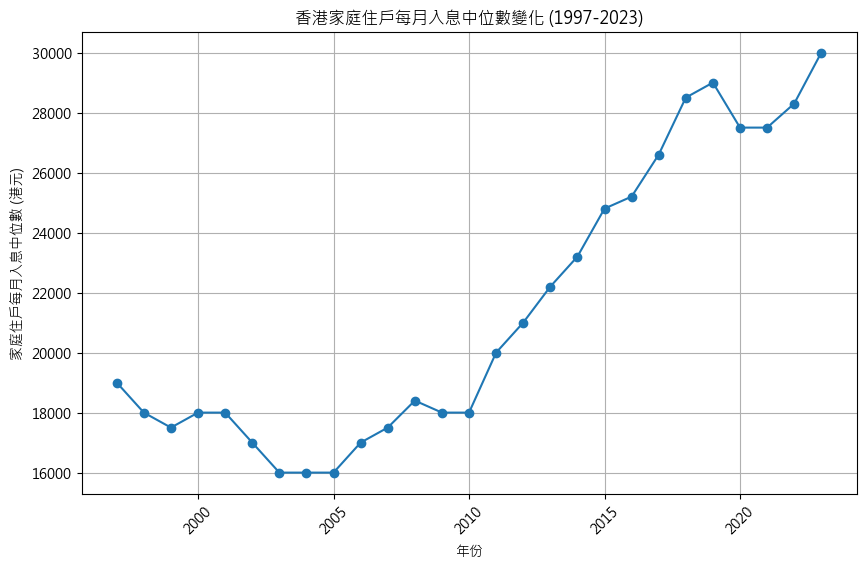

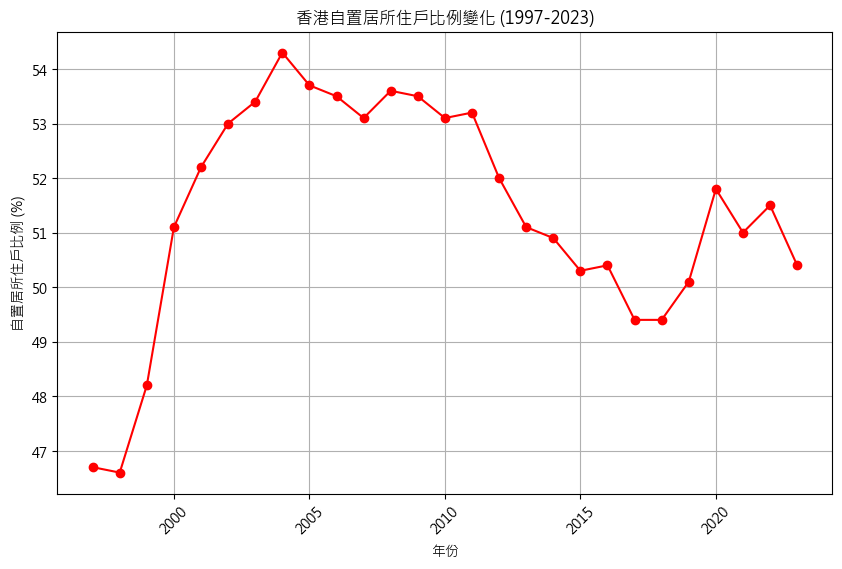

1997年至2023年,家庭住戶每月入息中位數增長了 57.89%
1997年至2023年,自置居所住戶比例變化了 3.70 個百分點


In [299]:
#根據香港政府統計處的數據,香港的自置居所比率(即家庭住戶自置居所住戶佔家庭住戶總數的百分比)如下:
#https://www.censtatd.gov.hk/tc/web_table.html?id=130-06102#  #自置居所 DATA 
#家庭住戶統計數字(千人)


import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

data_lbh = '''
年 / 移動3個月期間	家庭住戶每月入息中位數 (1)	自置居所住戶在家庭住戶總數目中所佔的比例 (2) 
1997	19,000	46.7 
1998	18,000	46.6 
1999	17,500	48.2 
2000	18,000	51.1 
2001	18,000	52.2 
2002	17,000	53.0 
2003	16,000	53.4 
2004	16,000	54.3 
2005	16,000	53.7 
2006	17,000	53.5 
2007	17,500	53.1 
2008	18,400	53.6 
2009	18,000	53.5 
2010	18,000	53.1 
2011	20,000	53.2 
2012	21,000	52.0 
2013	22,200	51.1 
2014	23,200	50.9 
2015	24,800	50.3 
2016	25,200	50.4 
2017	26,600	49.4 
2018	28,500	49.4 
2019	29,000	50.1 
2020	27,500	51.8 
2021	27,500	51.0 
2022	28,300	51.5 
2023	30,000	50.4
'''

df = pd.read_csv(StringIO(data_lbh), sep='\t', skiprows=1)
df.columns = ['年份', '家庭住戶每月入息中位數', '自置居所住戶比例']
df['家庭住戶每月入息中位數'] = df['家庭住戶每月入息中位數'].str.replace(',', '')
df['家庭住戶每月入息中位數'] = pd.to_numeric(df['家庭住戶每月入息中位數'])
df['自置居所住戶比例'] = pd.to_numeric(df['自置居所住戶比例'])

plt.figure(figsize=(10, 6))
plt.plot(df['年份'], df['家庭住戶每月入息中位數'], marker='o')
plt.xlabel('年份')
plt.ylabel('家庭住戶每月入息中位數 (港元)')
plt.title('香港家庭住戶每月入息中位數變化 (1997-2023)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['年份'], df['自置居所住戶比例'], marker='o', color='red')
plt.xlabel('年份')
plt.ylabel('自置居所住戶比例 (%)')
plt.title('香港自置居所住戶比例變化 (1997-2023)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

income_growth_rate = (df.iloc[-1]['家庭住戶每月入息中位數'] - df.iloc[0]['家庭住戶每月入息中位數']) / df.iloc[0]['家庭住戶每月入息中位數'] * 100
print(f"1997年至2023年,家庭住戶每月入息中位數增長了 {income_growth_rate:.2f}%")

ratio_change = df.iloc[-1]['自置居所住戶比例'] - df.iloc[0]['自置居所住戶比例']
print(f"1997年至2023年,自置居所住戶比例變化了 {ratio_change:.2f} 個百分點")

In [300]:
import statistics

sales_data = [74297, 45050, 43002]
median_sales = statistics.median(sales_data)

print(f"2021年至2023年的房屋銷售數量中位數為: {median_sales}")

2021年至2023年的房屋銷售數量中位數為: 45050
